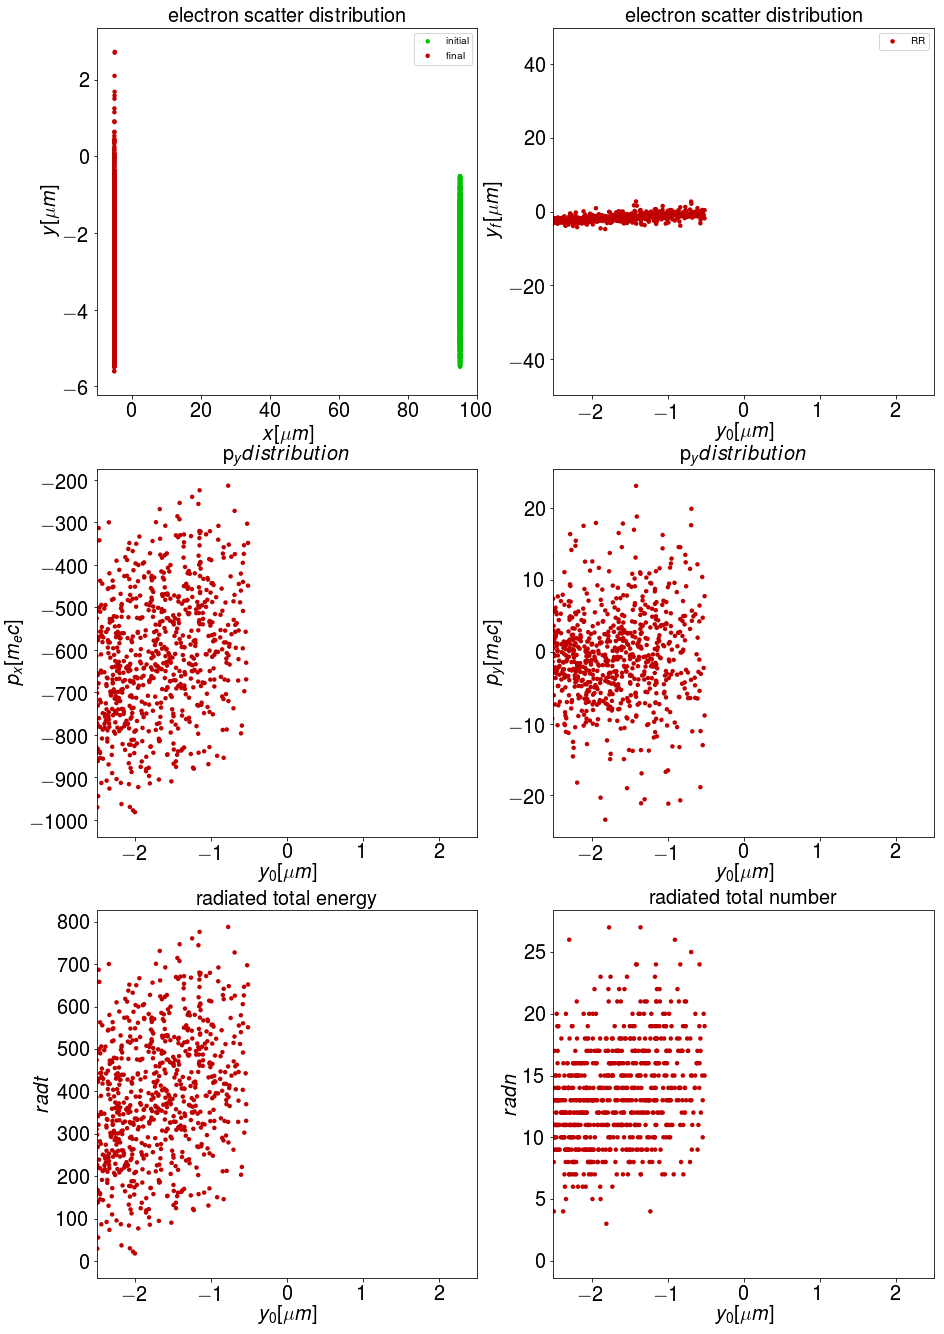

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
font = {'family' : 'helvivetica',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 20,
        }

part_number=2000
nsteps=2

insert='./Data/'
insert_n='_0'
t=np.loadtxt(insert+'t'+insert_n+'.txt')
y=np.loadtxt(insert+'y'+insert_n+'.txt')
x=np.loadtxt(insert+'x'+insert_n+'.txt')
px=np.loadtxt(insert+'px'+insert_n+'.txt')
py=np.loadtxt(insert+'py'+insert_n+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn=np.loadtxt(insert+'radn'+insert_n+'.txt')
radt=np.loadtxt(insert+'radt'+insert_n+'.txt')
opt=np.loadtxt(insert+'opt'+insert_n+'.txt')
eta=np.loadtxt(insert+'eta'+insert_n+'.txt')

t=np.reshape(t,(part_number,nsteps))
x=np.reshape(x,(part_number,nsteps))
y=np.reshape(y,(part_number,nsteps))
px=np.reshape(px,(part_number,nsteps))
py=np.reshape(py,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn,(part_number,nsteps))
radt=np.reshape(radt,(part_number,nsteps))
opt=np.reshape(opt,(part_number,nsteps))
eta=np.reshape(eta,(part_number,nsteps))

#print(np.where(py[:,-1] > 0))

gamma=np.sqrt(px**2+py**2+1)


makersize=20
plt.subplot(3,2,1)
plt.scatter(x[:,0]/2/np.pi,y[:,0]/2/np.pi,s=makersize,c=(0,192.0/255.0,0.0),label='initial',edgecolors='None')
plt.scatter(x[:,-1]/2/np.pi,y[:,-1]/2/np.pi,s=makersize,c=(192.0/255.0,0.0,0.0),label='final',edgecolors='None')
plt.legend(loc='upper right')
#plt.xlim(0.0,100.0)
#plt.ylim(-50,50)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$y [\mu m]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.title('electron scatter distribution',fontdict=font)

plt.subplot(3,2,2)
plt.scatter(y[:,0]/2/np.pi,y[:,-1]/2/np.pi,s=makersize,c=(192.0/255.0,0.0,0.0),label='RR',edgecolors='None')
plt.legend(loc='upper right')
plt.xlim(-2.5,2.5)
plt.ylim(-50,50)
plt.xlabel('$y_0 [\mu m]$',fontdict=font)
plt.ylabel('$y_f [\mu m]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.title('electron scatter distribution',fontdict=font)

plt.subplot(3,2,3)
plt.scatter(y[:,0]/2/np.pi,px[:,-1],s=makersize,c=(192.0/255.0,0.0,0.0),edgecolors='None')
plt.legend(loc='upper right')
plt.xlim(-2.5,2.5)
#plt.ylim(-50,50)
plt.xlabel('$y_0 [\mu m]$',fontdict=font)
plt.ylabel('$p_x [m_ec]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.title('p_y distribution',fontdict=font)

plt.subplot(3,2,4)
plt.scatter(y[:,0]/2/np.pi,py[:,-1],s=makersize,c=(192.0/255.0,0.0,0.0),edgecolors='None')
plt.legend(loc='upper right')
plt.xlim(-2.5,2.5)
#plt.ylim(-50,50)
plt.xlabel('$y_0 [\mu m]$',fontdict=font)
plt.ylabel('$p_y [m_ec]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.title('p_y distribution',fontdict=font)

plt.subplot(3,2,5)
plt.scatter(y[:,0]/2/np.pi,radt[:,-1],s=makersize,c=(192.0/255.0,0.0,0.0),edgecolors='None')
plt.legend(loc='upper right')
plt.xlim(-2.5,2.5)
#plt.ylim(-50,50)
plt.xlabel('$y_0 [\mu m]$',fontdict=font)
plt.ylabel('$radt$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.title('radiated total energy',fontdict=font)

plt.subplot(3,2,6)
plt.scatter(y[:,0]/2/np.pi,radn[:,-1],s=makersize,c=(192.0/255.0,0.0,0.0),edgecolors='None')
plt.legend(loc='upper right')
plt.xlim(-2.5,2.5)
#plt.ylim(-50,50)
plt.xlabel('$y_0 [\mu m]$',fontdict=font)
plt.ylabel('$radn$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.title('radiated total number',fontdict=font)


fig = plt.gcf()
fig.set_size_inches(15, 23)
#fig.savefig(to_path+'scatter'+str(n).zfill(4)+'.png',format='png',dpi=60)


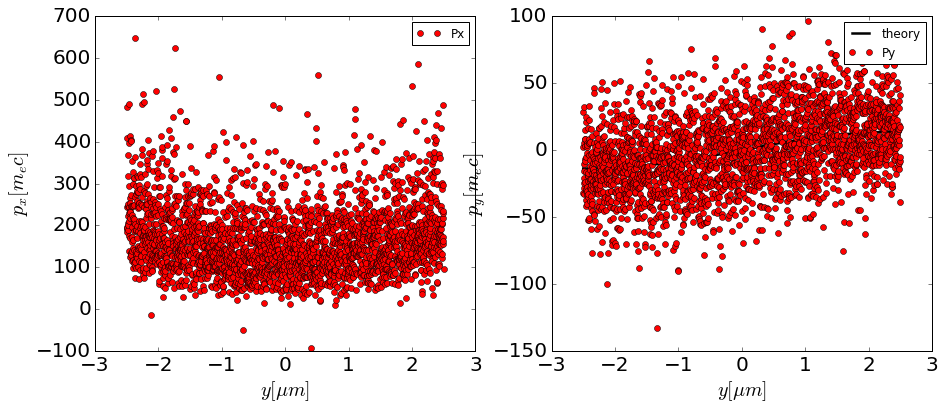

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
font = {'family' : 'monospace',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 20,
        }

part_number=2500
nsteps=2001

insert='q250_'
t=np.loadtxt(insert+'t'+'.txt')
y=np.loadtxt(insert+'y'+'.txt')
x=np.loadtxt(insert+'x'+'.txt')
px=np.loadtxt(insert+'px'+'.txt')
py=np.loadtxt(insert+'py'+'.txt')
ey=np.loadtxt(insert+'e_part'+'.txt')
bz=np.loadtxt(insert+'b_part'+'.txt')
ay=np.loadtxt(insert+'a_part'+'.txt')



t=np.reshape(t,(part_number,nsteps))
x=np.reshape(x,(part_number,nsteps))
y=np.reshape(y,(part_number,nsteps))
px=np.reshape(px,(part_number,nsteps))
py=np.reshape(py,(part_number,nsteps))
ey=np.reshape(ey,(part_number,nsteps))
ay=np.reshape(ay,(part_number,nsteps))
gamma=np.sqrt(px**2+py**2+1)

eta=1983.0
a_0=350
r_0=5.0
g_0=1000.0


T_y=np.linspace(-2.5,2.5,100,endpoint=True)

n=1
plt.subplot(121)
plt.plot(y[:,0]/2/np.pi,px[:,-1],'or',linewidth=2.5,label='Px')
plt.legend(loc='upper right')
#plt.xlim(93*2*np.pi,107*2*np.pi)
#plt.ylim(-50,50)
plt.xlabel('$y [\mu m]$',fontdict=font)
plt.ylabel('$p_x [m_ec]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(122)
from sympy import integrate,sin,exp  
from sympy.abc import x
#int=integrate((sin(x))**2*exp(-2*x**2/(3*2*np.pi)**2),(x,-10*2*np.pi,10*2*np.pi))

T_y=np.linspace(-2.5,2.5,100,endpoint=True)
T_py=a_0**2*4*T_y*np.exp(-2*T_y**2/r_0**2)/(2*g_0*r_0**2)*11.6/(4*np.pi)
plt.plot(T_y,T_py,'-k',linewidth=2.5,label='theory')
plt.plot(y[:,0]/2/np.pi,py[:,-1],'or',linewidth=2.5,label='Py')
plt.legend(loc='upper right')
#plt.xlim(93*2*np.pi,107*2*np.pi)
#plt.ylim(-50,50)
plt.xlabel('$y [\mu m]$',fontdict=font)
plt.ylabel('$p_y [m_ec]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);

#plt.figure(figsize=(100,100))
fig = plt.gcf()
fig.set_size_inches(15, 6)

In [101]:

print(np.where(py[:,-1] > 0))
x.shape
py[75,-1]

(array([ 2,  5,  8,  9, 12, 13, 15, 16, 17, 18, 19, 22, 24, 28, 32, 33, 37,
       38, 39, 40, 42, 44, 45, 46, 48, 49, 50, 51, 57, 58, 59, 61, 63, 64,
       66, 68, 70, 73, 75, 76, 77, 82, 83, 86, 91, 94, 95, 98]),)


21.170856000000001

[  54.223511    6.775402   13.164993  129.52377   399.548146   70.786387
    2.480612   43.286358    4.638802    1.992805    4.102945   13.11308
    3.206735   13.202717    2.048833    1.089725]


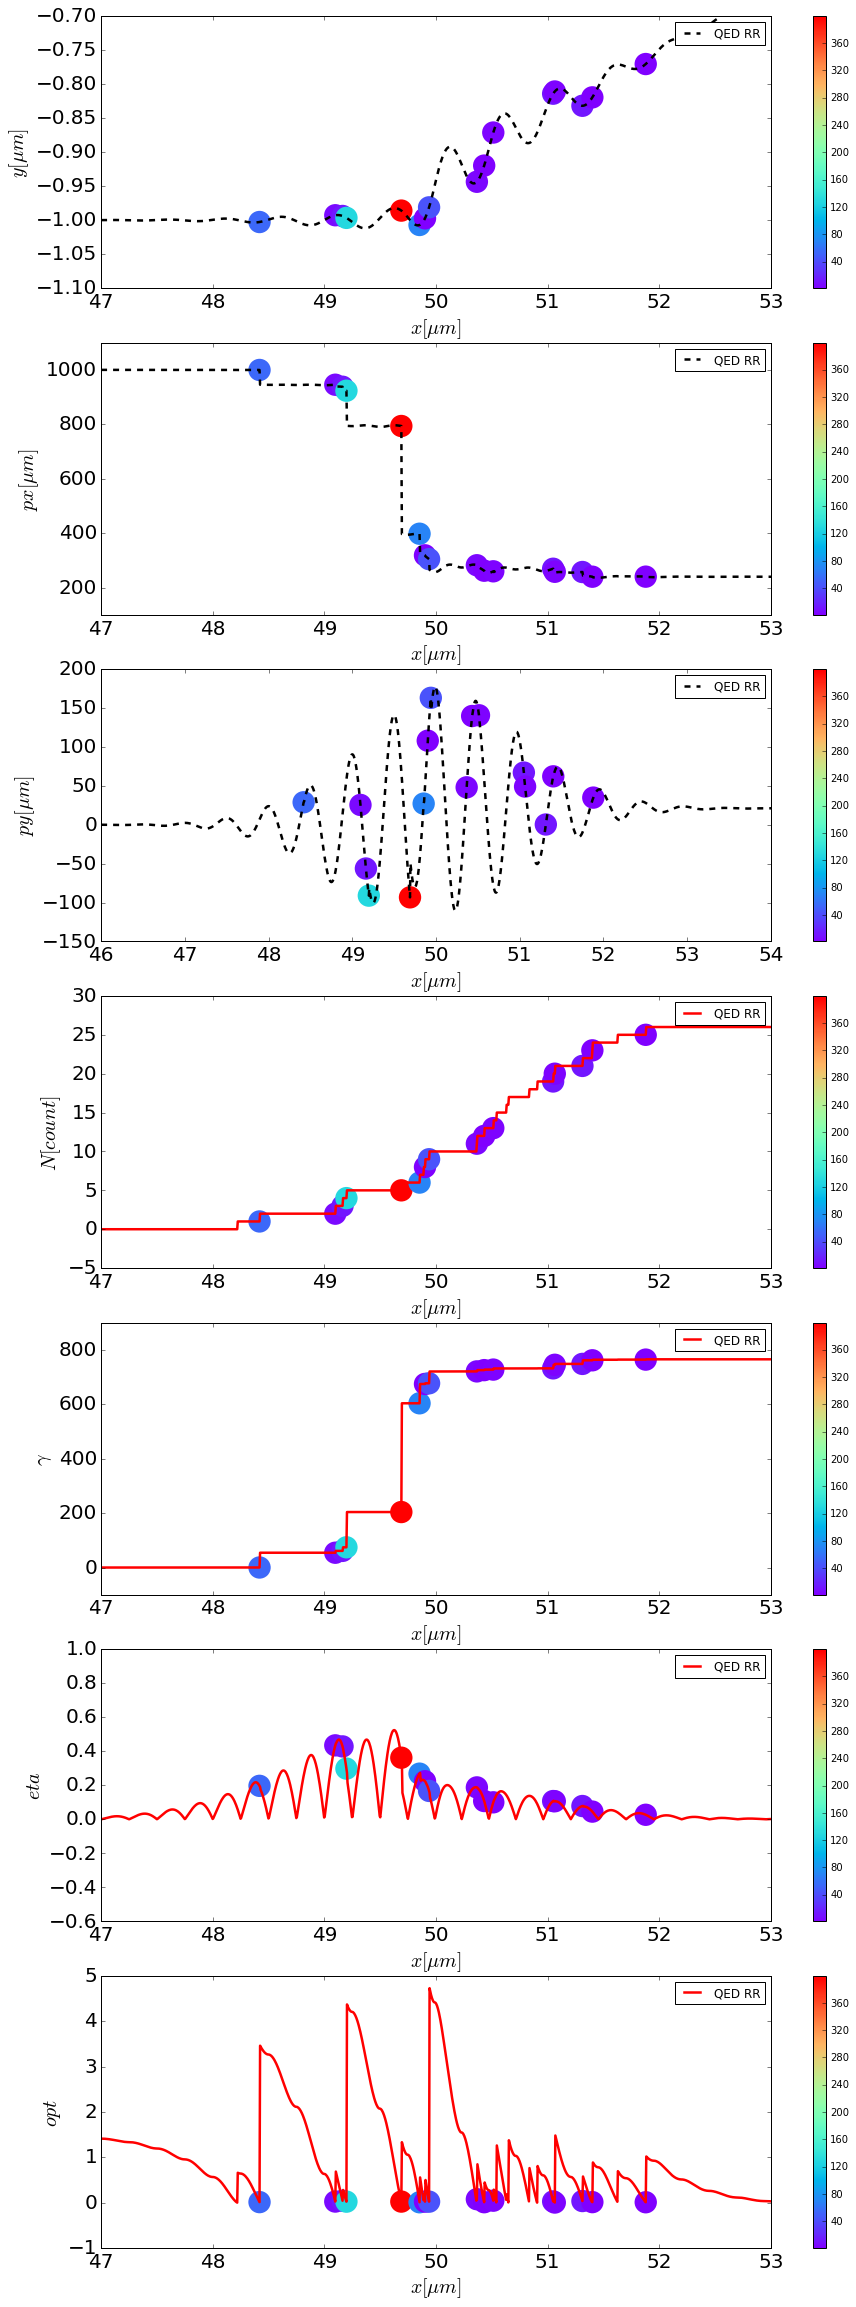

In [3]:
index=75

rrn=(radn[index,1:-1]-radn[index,0:-2])
rrt=(radt[index,1:-1]-radt[index,0:-2])
which=np.where(rrt >= 1)
rrn=rrn[which]
rrt=rrt[which]

plt.subplot(7,1,1)
plt.scatter(x[index,which]/2/np.pi, y[index,which]/2/np.pi, c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi,y[index,:]/2/np.pi,'--k',linewidth=2.5,label='QED RR')
plt.legend(loc='upper right')
plt.colorbar()
plt.xlim(47,53)
plt.ylim(-1.1,-0.7)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$y [\mu m]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(7,1,2)
plt.scatter(x[index,which]/2/np.pi, px[index,which], c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi,px[index,:],'--k',linewidth=2.5,label='QED RR')
plt.legend(loc='upper right')
plt.colorbar()
plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$px [\mu m]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(7,1,3)
plt.scatter(x[index,which]/2/np.pi, py[index,which], c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi,py[index,:],'--k',linewidth=2.5,label='QED RR')
plt.legend(loc='upper right')
plt.colorbar()
plt.xlim(46,54)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$py [\mu m]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(7,1,4)
plt.scatter(x[index,which]/2/np.pi, radn[index,which], c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi,radn[index,:],'-r',linewidth=2.5,label='QED RR')
plt.legend(loc='upper right')
plt.colorbar()
plt.xlim(47,53)
#plt.ylim(-1.5,-0.5)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$N [count]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(7,1,5)
plt.scatter(x[index,which]/2/np.pi, radt[index,which], c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi,radt[index,:],'-r',linewidth=2.5,label='QED RR')
plt.legend(loc='upper right')
plt.colorbar()
plt.xlim(47,53)
#plt.ylim(-1.5,-0.5)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$\gamma$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(7,1,6)
plt.scatter(x[index,which]/2/np.pi, eta[index,which], c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi,eta[index,:],'-r',linewidth=2.5,label='QED RR')
plt.legend(loc='upper right')
plt.colorbar()
plt.xlim(47,53)
#plt.ylim(-1.5,-0.5)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$eta$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(7,1,7)
plt.scatter(x[index,which]/2/np.pi, opt[index,which], c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi,opt[index,:],'-r',linewidth=2.5,label='QED RR')
plt.legend(loc='upper right')
plt.colorbar()
plt.xlim(47,53)
#plt.ylim(-1.5,-0.5)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$opt$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

#plt.show()
#plt.figure(figsize=(100,100))
fig = plt.gcf()
fig.set_size_inches(15, 40)
np.max(radn[index,1:-1]-radn[index,0:-2])
np.max(radt[index,1:-1]-radt[index,0:-2])
print(rrt)

In [63]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
font = {'family' : 'monospace',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 20,
        }
part_number=100
nsteps=20002
insert='./Data/'
t=np.loadtxt(insert+'t'+'.txt')
y=np.loadtxt(insert+'y'+'.txt')
x=np.loadtxt(insert+'x'+'.txt')
px=np.loadtxt(insert+'px'+'.txt')
py=np.loadtxt(insert+'py'+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn=np.loadtxt(insert+'radn'+'.txt')
radt=np.loadtxt(insert+'radt'+'.txt')
opt=np.loadtxt(insert+'opt'+'.txt')
eta=np.loadtxt(insert+'eta'+'.txt')

t=np.reshape(t,(part_number,nsteps))
x=np.reshape(x,(part_number,nsteps))
y=np.reshape(y,(part_number,nsteps))
px=np.reshape(px,(part_number,nsteps))
py=np.reshape(py,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn,(part_number,nsteps))
radt=np.reshape(radt,(part_number,nsteps))
opt=np.reshape(opt,(part_number,nsteps))
eta=np.reshape(eta,(part_number,nsteps))

print(np.where(py[:,-1] > 0))

gamma=np.sqrt(px**2+py**2+1)
    
rrn=(radn[:,1:-1]-radn[:,0:-2])
rrt=(radt[:,1:-1]-radt[:,0:-2])

series=np.where(py[:,-1] > 10)

for index in np.reshape(series,(np.size(series),)):
    which=np.where(rrt[index,:] >= 1)
    plt.subplot(7,1,1)
    #print(rrt.shape,x[index,which].shape)
    plt.scatter(x[index,which]/2/np.pi, y[index,which]/2/np.pi, c=rrt[index,which], s=500, cmap='rainbow', edgecolors='None')
    plt.plot(x[index,:]/2/np.pi,y[index,:]/2/np.pi,'--k',linewidth=2.5,label='QED RR')
    plt.legend(loc='upper right')
    plt.colorbar()
    plt.xlim(48,52)
    plt.ylim(-1.1,-0.7)
    plt.xlabel('$x [\mu m]$',fontdict=font)
    plt.ylabel('$y [\mu m]$',fontdict=font)
    plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(7,1,2)
    plt.scatter(x[index,which]/2/np.pi, px[index,which], c=rrt[index,which], s=500, cmap='rainbow', edgecolors='None')
    plt.plot(x[index,:]/2/np.pi,px[index,:],'--k',linewidth=2.5,label='QED RR')
    plt.legend(loc='upper right')
    plt.colorbar()
    plt.xlim(48,52)
    #plt.ylim(-1.1,-0.7)
    plt.xlabel('$x [\mu m]$',fontdict=font)
    plt.ylabel('$px [\mu m]$',fontdict=font)
    plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
    
    plt.subplot(7,1,3)
    plt.scatter(x[index,which]/2/np.pi, py[index,which], c=rrt[index,which], s=500, cmap='rainbow', edgecolors='None')
    plt.plot(x[index,:]/2/np.pi,py[index,:],'--k',linewidth=2.5,label='QED RR')
    plt.legend(loc='upper right')
    plt.colorbar()
    plt.xlim(48,52)
    #plt.ylim(-1.1,-0.7)
    plt.xlabel('$x [\mu m]$',fontdict=font)
    plt.ylabel('$py [\mu m]$',fontdict=font)
    plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
    
    plt.subplot(7,1,4)
    plt.scatter(x[index,which]/2/np.pi, radn[index,which], c=rrt[index,which], s=500, cmap='rainbow', edgecolors='None')
    plt.plot(x[index,:]/2/np.pi,radn[index,:],'-r',linewidth=2.5,label='QED RR')
    plt.legend(loc='upper right')
    plt.colorbar()
    plt.xlim(48,52)
    #plt.ylim(-1.5,-0.5)
    plt.xlabel('$x [\mu m]$',fontdict=font)
    plt.ylabel('$N [count]$',fontdict=font)
    plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(7,1,5)
    plt.scatter(x[index,which]/2/np.pi, radt[index,which], c=rrt[index,which], s=500, cmap='rainbow', edgecolors='None')
    plt.plot(x[index,:]/2/np.pi,radt[index,:],'-r',linewidth=2.5,label='QED RR')
    plt.legend(loc='upper right')
    plt.colorbar()
    plt.xlim(48,52)
    #plt.ylim(-1.5,-0.5)
    plt.xlabel('$x [\mu m]$',fontdict=font)
    plt.ylabel('$\gamma$',fontdict=font)
    plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(7,1,6)
    plt.scatter(x[index,which]/2/np.pi, eta[index,which], c=rrt[index,which], s=500, cmap='rainbow', edgecolors='None')
    plt.plot(x[index,:]/2/np.pi,eta[index,:],'-r',linewidth=2.5,label='QED RR')
    plt.legend(loc='upper right')
    plt.colorbar()
    plt.xlim(48,52)
    #plt.ylim(-1.5,-0.5)
    plt.xlabel('$x [\mu m]$',fontdict=font)
    plt.ylabel('$eta$',fontdict=font)
    plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(7,1,7)
    plt.scatter(x[index,which]/2/np.pi, opt[index,which], c=rrt[index,which], s=500, cmap='rainbow', edgecolors='None')
    plt.plot(x[index,:]/2/np.pi,opt[index,:],'-r',linewidth=2.5,label='QED RR')
    plt.legend(loc='upper right')
    plt.colorbar()
    plt.xlim(48,52)
    #plt.ylim(-1.5,-0.5)
    plt.xlabel('$x [\mu m]$',fontdict=font)
    plt.ylabel('$opt$',fontdict=font)
    plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    #plt.show()
    #lt.figure(figsize=(100,100))
    fig = plt.gcf()
    fig.set_size_inches(10, 50)
    fig.savefig('./limit1/'+str(index).zfill(4)+'.png',format='png',dpi=60)
    plt.close("all")
    #np.max(radn[index,1:-1]-radn[index,0:-2])
    #np.max(radt[index,1:-1]-radt[index,0:-2])
    #print(rrt)

(array([ 2,  5,  8,  9, 12, 13, 15, 16, 17, 18, 19, 22, 24, 28, 32, 33, 37,
       38, 39, 40, 42, 44, 45, 46, 48, 49, 50, 51, 57, 58, 59, 61, 63, 64,
       66, 68, 70, 73, 75, 76, 77, 82, 83, 86, 91, 94, 95, 98]),)


(array([ 2,  5,  8,  9, 12, 13, 15, 16, 17, 18, 19, 22, 24, 28, 32, 33, 37,
       38, 39, 40, 42, 44, 45, 46, 48, 49, 50, 51, 57, 58, 59, 61, 63, 64,
       66, 68, 70, 73, 75, 76, 77, 82, 83, 86, 91, 94, 95, 98]),)


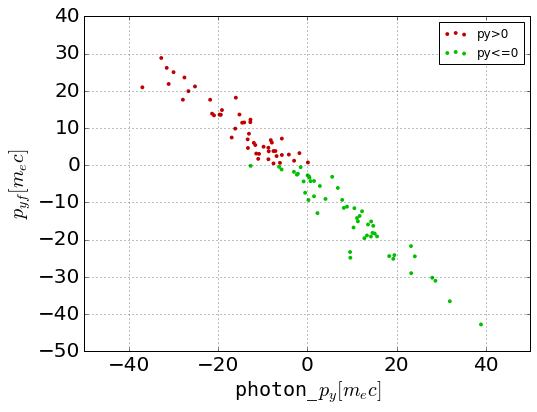

In [31]:
#index=75
rrn=(radn[:,1:-1]-radn[:,0:-2])
rrt=(radt[:,1:-1]-radt[:,0:-2])
#which=np.where(rrt[index,:] >= 1)
gamma=np.sqrt(px**2+py**2+1)
#photon_gamma=0;photon_px=0;photon_py=0;
photon_x=np.zeros(100);photon_y=np.zeros(100)
for ith in np.arange(100):
    photon_gamma=0;photon_px=0;photon_py=0
    index=ith
    which=np.where(rrt[index,:] >= 1)
    for i in np.reshape(which,(np.size(which),)):
        photon_gamma = gamma[index,i]-gamma[index,i+1]
        photon_px += photon_gamma*px[index,i]/np.sqrt(px[index,i]**2+py[index,i]**2)
        photon_py += photon_gamma*py[index,i]/np.sqrt(px[index,i]**2+py[index,i]**2)
    #print(ith,'photon_g=',photon_gamma,'photon_px=',photon_px,'photon_py=',photon_py,'py=',py[index,-1])
    #print(ith,'photon_px=',photon_px,'photon_py=',photon_py,'py=',py[index,-1])
    photon_x[ith]=photon_px;photon_y[ith]=photon_py;

#plt.subplot(3,2,6)
index=np.where(py[:,-1] > 0.0)
print(index)
plt.scatter(photon_y[index],py[index,-1],s=20,c=(192.0/255.0,0.0,0.0),label='py>0',edgecolors='None')
index=np.where(py[:,-1] <= 0.0)
plt.scatter(photon_y[index],py[index,-1],s=20,c=(0.0,192.0/255.0,0.0),label='py<=0',edgecolors='None')
plt.legend(loc='upper right')
plt.grid()
#plt.xlim(-2.5,2.5)
#plt.ylim(-50,50)
plt.xlabel('photon_$p_y [m_ec]$',fontdict=font)
plt.ylabel('$p_{yf} [m_ec]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.show()
#plt.figure(figsize=(100,100))
fig = plt.gcf()
fig.set_size_inches(8, 6)
#plt.title('radiated total number',fontdict=font)
#    print('px,',px[index,i-2:i+3],px[index,i+1])
#    print('py,',py[index,i-2:i+3],py[index,i+1])
#    print('gamma,',gamma[index,i-2:i+3],gamma[index,i+1])
#    print(i)
#(1000.04-945.86)
#photon_px=

In [16]:
10.0*9.1e-31*3.0e8/(2.0e4*1.6e-19)*2

1.7062500000000002e-06

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)


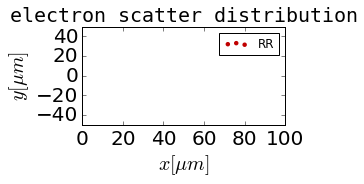

In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
font = {'family' : 'monospace',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 20,
        }
part_number=100
nsteps=20002

insert='./Data/'
t=np.loadtxt(insert+'t'+'.txt')
y=np.loadtxt(insert+'y'+'.txt')
x=np.loadtxt(insert+'x'+'.txt')
px=np.loadtxt(insert+'px'+'.txt')
py=np.loadtxt(insert+'py'+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn=np.loadtxt(insert+'radn'+'.txt')
radt=np.loadtxt(insert+'radt'+'.txt')
opt=np.loadtxt(insert+'opt'+'.txt')
eta=np.loadtxt(insert+'eta'+'.txt')

t=np.reshape(t,(part_number,nsteps))
x=np.reshape(x,(part_number,nsteps))
y=np.reshape(y,(part_number,nsteps))
px=np.reshape(px,(part_number,nsteps))
py=np.reshape(py,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn,(part_number,nsteps))
radt=np.reshape(radt,(part_number,nsteps))
opt=np.reshape(opt,(part_number,nsteps))
eta=np.reshape(eta,(part_number,nsteps))

print(np.where(py[:,-1] > 0))

gamma=np.sqrt(px**2+py**2+1)


makersize=20
plt.subplot(3,2,1)
plt.scatter(x[:,-1]/2/np.pi,y[:,-1]/2/np.pi,s=makersize,c=(192.0/255.0,0.0,0.0),label='RR',edgecolors='None')
plt.legend(loc='upper right')
plt.xlim(0.0,100.0)
plt.ylim(-50,50)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$y [\mu m]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.title('electron scatter distribution',fontdict=font)
fig = plt.gcf()
fig.set_size_inches(8, 6)

(array([-10.,  -5.,   0.,   5.,  10.]), <a list of 5 Text yticklabel objects>)

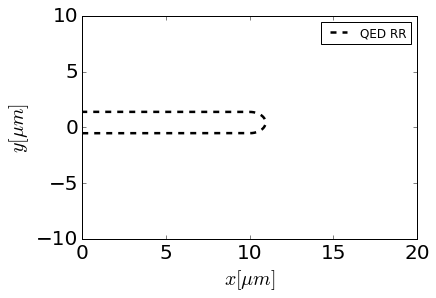

In [39]:
index=99
plt.plot(x[index,0:5500]/2/np.pi,y[index,0:5500]/2/np.pi,'--k',linewidth=2.5,label='QED RR')
plt.legend(loc='upper right')
plt.xlim(0,20)
plt.ylim(-10,10)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$y [\mu m]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

In [54]:
60.0*9.1e-31*3.0e8/(10.0e4*1.6e-19)*2

2.0475e-06

In [52]:
60.0/10.0*2/2.0/3.14

1.910828025477707

In [53]:
9.1e-31*3e8*2*3.14/1e-6/1.6e-19

10715.250000000002

In [55]:
10.0/1.0*2/2.0/3.14

3.184713375796178

/Users/michael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


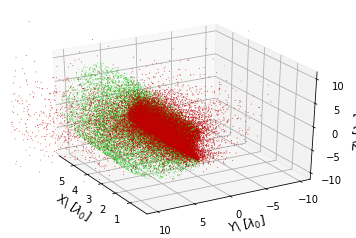

In [5]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
font = {'family' : 'helvetica',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
        }
part_number=20000
nsteps=2

insert1='./Dataqe/'
insert_n='_0'
#t=np.loadtxt(insert+'t'+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
#px=np.loadtxt(insert+'px'+'.txt')
#py=np.loadtxt(insert+'py'+'.txt')
#pz=np.loadtxt(insert+'pz'+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
#radn=np.loadtxt(insert+'radn'+'.txt')
#radt=np.loadtxt(insert+'radt'+'.txt')
#opt=np.loadtxt(insert+'opt'+'.txt')
#eta=np.loadtxt(insert+'eta'+'.txt')

#t=np.reshape(t,(part_number,nsteps))
x1=np.reshape(x1,(part_number,nsteps))
y1=np.reshape(y1,(part_number,nsteps))
z1=np.reshape(z1,(part_number,nsteps))
#px=np.reshape(px,(part_number,nsteps))
#py=np.reshape(py,(part_number,nsteps))
#pz=np.reshape(pz,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
#radn=np.reshape(radn,(part_number,nsteps))
#radt=np.reshape(radt,(part_number,nsteps))
#opt=np.reshape(opt,(part_number,nsteps))
#eta=np.reshape(eta,(part_number,nsteps))

#print(np.where(py[:,-1] > 0))

#gamma=np.sqrt(px**2+py**2+1)
insert1='./Datarr/'
insert_n='_0'
#t=np.loadtxt(insert+'t'+'.txt')
z2=np.loadtxt(insert1+'z'+insert_n+'.txt')
y2=np.loadtxt(insert1+'y'+insert_n+'.txt')
x2=np.loadtxt(insert1+'x'+insert_n+'.txt')

x2=np.reshape(x2,(part_number,nsteps))
y2=np.reshape(y2,(part_number,nsteps))
z2=np.reshape(z2,(part_number,nsteps))




makersize=0.8
fig = plt.figure()
#ax = Axes3D(fig)
ax = plt.axes(projection='3d')
ax.scatter3D(x1[:,-1]/2/np.pi,y1[:,-1]/2/np.pi,z1[:,-1]/2/np.pi,s=makersize,depthshade=True,c=(192/255.0,0,0),edgecolor='none')
ax.scatter3D(x2[:,-1]/2/np.pi,y2[:,-1]/2/np.pi,z2[:,-1]/2/np.pi,s=makersize,depthshade=True,c=(0.0,192/255.0,0),edgecolor='none')
#ax.scatter(x1[:,0]/2/np.pi,y1[:,0]/2/np.pi,z1[:,0]/2/np.pi,s=makersize,depthshade=True,c=(192/255.0,0,0),edgecolor='none')
#ax.scatter(x2[:,-1]/2/np.pi,y2[:,-1]/2/np.pi,z2[:,-1]/2/np.pi,s=makersize,depthshade=True,c=(0,192/255.0,0),edgecolor='none')
#ax.scatter(x2[:,0]/2/np.pi,y2[:,0]/2/np.pi,z2[:,0]/2/np.pi,s=makersize,depthshade=True,c=(192/255.0,0,0),edgecolor='none')



ax.set_xlabel(r'X\ [$\lambda_0$]',fontdict=font)
ax.set_ylabel(r'Y\ [$\lambda_0$]',fontdict=font)
ax.set_zlabel(r'Z\ [$\lambda_0$]',fontdict=font)
#ax.set_xticklabels(labels=r'X\ [$\lambda_0$]', minor=False)
#ax.set_xticks(ticks=[-10,-5,0,5,10],minor=False)
ax.set_yticks(ticks=[-10,-5,0,5,10],minor=False)
ax.set_zticks(ticks=[-10,-5,0,5,10],minor=False)

#ax.set_zticks(minor=False,fontsize=20)
ax.set_xlim([0.01,5.99])
ax.set_ylim([-10.99,10.99])
ax.set_zlim([-10.99,10.99])
#ax.set_xticklabels(labels='X [$\lambda_0$]', fontsize=20)
#for tick in ax.xaxis.get_major_ticks():
#                tick.label.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 
                #tick.label.set_rotation('vertical')
ax.grid(linestyle='.', linewidth='0.5', color='red')
ax.view_init(elev=30, azim=150)
fig = plt.gcf()
#fig.set_size_inches(5, 4.5)
#fig.savefig('3dscatter.png',format='png',dpi=640)
#plt.close("all")

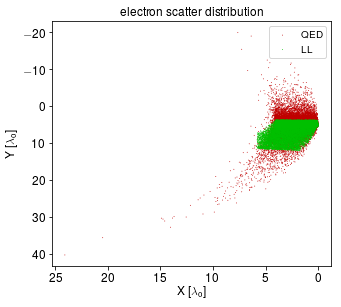

In [183]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
font = {'family' : 'helvetica',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
        }
part_number=20000
nsteps=2

insert1='./Dataqe/'
insert_n='_0'
#t=np.loadtxt(insert+'t'+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
#px=np.loadtxt(insert+'px'+'.txt')
#py=np.loadtxt(insert+'py'+'.txt')
#pz=np.loadtxt(insert+'pz'+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
#radn=np.loadtxt(insert+'radn'+'.txt')
#radt=np.loadtxt(insert+'radt'+'.txt')
#opt=np.loadtxt(insert+'opt'+'.txt')
#eta=np.loadtxt(insert+'eta'+'.txt')

#t=np.reshape(t,(part_number,nsteps))
x1=np.reshape(x1,(part_number,nsteps))
y1=np.reshape(y1,(part_number,nsteps))
z1=np.reshape(z1,(part_number,nsteps))
#px=np.reshape(px,(part_number,nsteps))
#py=np.reshape(py,(part_number,nsteps))
#pz=np.reshape(pz,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
#radn=np.reshape(radn,(part_number,nsteps))
#radt=np.reshape(radt,(part_number,nsteps))
#opt=np.reshape(opt,(part_number,nsteps))
#eta=np.reshape(eta,(part_number,nsteps))

#print(np.where(py[:,-1] > 0))

#gamma=np.sqrt(px**2+py**2+1)
insert1='./Datarr/'
insert_n='_0'
#t=np.loadtxt(insert+'t'+'.txt')
z2=np.loadtxt(insert1+'z'+insert_n+'.txt')
y2=np.loadtxt(insert1+'y'+insert_n+'.txt')
x2=np.loadtxt(insert1+'x'+insert_n+'.txt')

x2=np.reshape(x2,(part_number,nsteps))
y2=np.reshape(y2,(part_number,nsteps))
z2=np.reshape(z2,(part_number,nsteps))
ax = plt.gca() 
ax.invert_xaxis()
ax.invert_yaxis()
#plt.xticks(rotation=90)


makersize=0.8
plt.scatter(x1[:,-1]/2/np.pi,y1[:,-1]/2/np.pi,s=makersize,c=(192.0/255.0,0.0,0.0),label='QED',edgecolors='None')
plt.scatter(x2[:,-1]/2/np.pi,y2[:,-1]/2/np.pi,s=makersize,c=(0,192.0/255.0,0.0),label='LL',edgecolors='None')
#plt.scatter(x[:,-1]/2/np.pi,y[:,-1]/2/np.pi,s=makersize,c=(192.0/255.0,0.0,0.0),label='final',edgecolors='None')
plt.legend(loc='upper right')
#plt.xlim(0.0,100.0)
#plt.ylim(-50,50)
plt.xlabel(r'X\ [$\lambda_0$]',fontdict=font)
plt.ylabel(r'Y\ [$\lambda_0$]',fontdict=font)
plt.xticks(fontsize=12); plt.yticks(fontsize=12);
plt.title('electron scatter distribution',fontdict=font)

fig = plt.gcf()
fig.set_size_inches(5, 4.5)
#fig.savefig('2dscatter_xy.png',format='png',dpi=640)
#plt.close("all")

/Users/michael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


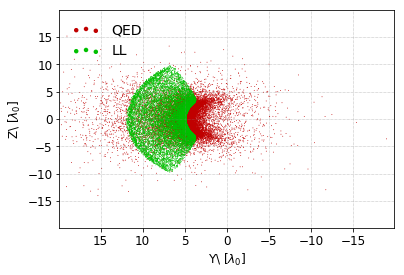

In [4]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
font = {'family' : 'helvetica',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
        }
part_number=20000
nsteps=2

insert1='./Dataqe/'
insert_n='_0'
#t=np.loadtxt(insert+'t'+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
#px=np.loadtxt(insert+'px'+'.txt')
#py=np.loadtxt(insert+'py'+'.txt')
#pz=np.loadtxt(insert+'pz'+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
#radn=np.loadtxt(insert+'radn'+'.txt')
#radt=np.loadtxt(insert+'radt'+'.txt')
#opt=np.loadtxt(insert+'opt'+'.txt')
#eta=np.loadtxt(insert+'eta'+'.txt')

#t=np.reshape(t,(part_number,nsteps))
x1=np.reshape(x1,(part_number,nsteps))
y1=np.reshape(y1,(part_number,nsteps))
z1=np.reshape(z1,(part_number,nsteps))
#px=np.reshape(px,(part_number,nsteps))
#py=np.reshape(py,(part_number,nsteps))
#pz=np.reshape(pz,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
#radn=np.reshape(radn,(part_number,nsteps))
#radt=np.reshape(radt,(part_number,nsteps))
#opt=np.reshape(opt,(part_number,nsteps))
#eta=np.reshape(eta,(part_number,nsteps))

#print(np.where(py[:,-1] > 0))

#gamma=np.sqrt(px**2+py**2+1)
insert1='./Datarr/'
insert_n='_0'
#t=np.loadtxt(insert+'t'+'.txt')
z2=np.loadtxt(insert1+'z'+insert_n+'.txt')
y2=np.loadtxt(insert1+'y'+insert_n+'.txt')
x2=np.loadtxt(insert1+'x'+insert_n+'.txt')

x2=np.reshape(x2,(part_number,nsteps))
y2=np.reshape(y2,(part_number,nsteps))
z2=np.reshape(z2,(part_number,nsteps))




makersize=0.8
plt.scatter(y1[:,-1]/2/np.pi,z1[:,-1]/2/np.pi,s=makersize,c=(192.0/255.0,0.0,0.0),label='QED',edgecolors='None')
plt.scatter(y2[:,-1]/2/np.pi,z2[:,-1]/2/np.pi,s=makersize,c=(0,192.0/255.0,0.0),label='LL',edgecolors='None')
#plt.scatter(x[:,-1]/2/np.pi,y[:,-1]/2/np.pi,s=makersize,c=(192.0/255.0,0.0,0.0),label='final',edgecolors='None')
plt.legend(fontsize=14,loc='upper left',markerscale=5,scatterpoints=3,framealpha=0.0)
plt.xlim(-19.9,19.9)
plt.ylim(-19.9,19.9)
ax = plt.gca() 
ax.invert_xaxis()
#ax.invert_yaxis()
plt.xlabel(r'Y\ [$\lambda_0$]',fontdict=font)
plt.ylabel(r'Z\ [$\lambda_0$]',fontdict=font)
plt.xticks(fontsize=12); plt.yticks(fontsize=12);
#plt.title('electron scatter distribution',fontdict=font)
plt.grid(color='gray', linestyle='dotted', linewidth=0.5)
fig = plt.gcf()
#fig.set_size_inches(5.4, 4.5)
#fig.savefig('2dscatter_yz.png',format='png',dpi=640)
#plt.close("all")

/Users/michael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


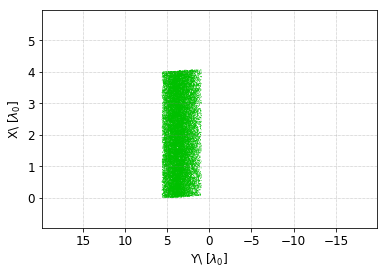

In [3]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
font = {'family' : 'helvetica',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
        }
part_number=20000
nsteps=2

insert1='./Dataqe/'
insert_n='_0'
#t=np.loadtxt(insert+'t'+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
#px=np.loadtxt(insert+'px'+'.txt')
#py=np.loadtxt(insert+'py'+'.txt')
#pz=np.loadtxt(insert+'pz'+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
#radn=np.loadtxt(insert+'radn'+'.txt')
#radt=np.loadtxt(insert+'radt'+'.txt')
#opt=np.loadtxt(insert+'opt'+'.txt')
#eta=np.loadtxt(insert+'eta'+'.txt')

#t=np.reshape(t,(part_number,nsteps))
x1=np.reshape(x1,(part_number,nsteps))
y1=np.reshape(y1,(part_number,nsteps))
z1=np.reshape(z1,(part_number,nsteps))
#px=np.reshape(px,(part_number,nsteps))
#py=np.reshape(py,(part_number,nsteps))
#pz=np.reshape(pz,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
#radn=np.reshape(radn,(part_number,nsteps))
#radt=np.reshape(radt,(part_number,nsteps))
#opt=np.reshape(opt,(part_number,nsteps))
#eta=np.reshape(eta,(part_number,nsteps))

#print(np.where(py[:,-1] > 0))

#gamma=np.sqrt(px**2+py**2+1)
insert1='./Datano/'
insert_n='_0'
#t=np.loadtxt(insert+'t'+'.txt')
z2=np.loadtxt(insert1+'z'+insert_n+'.txt')
y2=np.loadtxt(insert1+'y'+insert_n+'.txt')
x2=np.loadtxt(insert1+'x'+insert_n+'.txt')

x2=np.reshape(x2,(part_number,nsteps))
y2=np.reshape(y2,(part_number,nsteps))
z2=np.reshape(z2,(part_number,nsteps))




makersize=0.8
#plt.scatter(y1[:,-1]/2/np.pi,x1[:,-1]/2/np.pi,s=makersize,c=(192.0/255.0,0.0,0.0),label='QED',edgecolors='None')
plt.scatter(y2[:,-1]/2/np.pi,x2[:,-1]/2/np.pi,s=makersize,c=(0,192.0/255.0,0.0),label='LL',edgecolors='None')
#plt.scatter(x[:,-1]/2/np.pi,y[:,-1]/2/np.pi,s=makersize,c=(192.0/255.0,0.0,0.0),label='final',edgecolors='None')
#plt.legend(fontsize=14,loc='upper left',markerscale=5,scatterpoints=3,framealpha=0.0)
plt.xlim(-19.85,19.85)
plt.ylim(-0.95,5.95)
#ax.set_xlim([0.01,5.99])
#ax.set_ylim([-10.99,10.99])
#ax.set_zlim([-10.99,10.99])
ax = plt.gca() 
ax.invert_xaxis()
#ax.invert_yaxis()
plt.xlabel(r'Y\ [$\lambda_0$]',fontdict=font)
plt.ylabel(r'X\ [$\lambda_0$]',fontdict=font)
plt.xticks(fontsize=12); plt.yticks(fontsize=12);
#plt.title('electron scatter distribution',fontdict=font)
plt.grid(color='gray', linestyle='dotted', linewidth=0.5)
fig = plt.gcf()
#fig.set_size_inches(5.4, 4.5)
#fig.savefig('2dscatter_xy.png',format='png',dpi=640)
#plt.close("all")

/Users/michael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


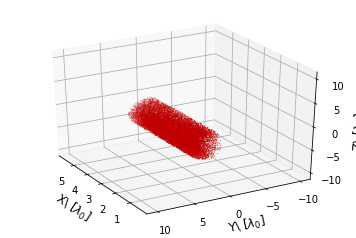

In [6]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
font = {'family' : 'helvetica',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
        }
part_number=20000
nsteps=2

insert1='./Datano/'
insert_n='_0'
#t=np.loadtxt(insert+'t'+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
#px=np.loadtxt(insert+'px'+'.txt')
#py=np.loadtxt(insert+'py'+'.txt')
#pz=np.loadtxt(insert+'pz'+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
#radn=np.loadtxt(insert+'radn'+'.txt')
#radt=np.loadtxt(insert+'radt'+'.txt')
#opt=np.loadtxt(insert+'opt'+'.txt')
#eta=np.loadtxt(insert+'eta'+'.txt')

#t=np.reshape(t,(part_number,nsteps))
x1=np.reshape(x1,(part_number,nsteps))
y1=np.reshape(y1,(part_number,nsteps))
z1=np.reshape(z1,(part_number,nsteps))
#px=np.reshape(px,(part_number,nsteps))
#py=np.reshape(py,(part_number,nsteps))
#pz=np.reshape(pz,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
#radn=np.reshape(radn,(part_number,nsteps))
#radt=np.reshape(radt,(part_number,nsteps))
#opt=np.reshape(opt,(part_number,nsteps))
#eta=np.reshape(eta,(part_number,nsteps))

#print(np.where(py[:,-1] > 0))

#gamma=np.sqrt(px**2+py**2+1)
insert1='./Datarr/'
insert_n='_0'
#t=np.loadtxt(insert+'t'+'.txt')
z2=np.loadtxt(insert1+'z'+insert_n+'.txt')
y2=np.loadtxt(insert1+'y'+insert_n+'.txt')
x2=np.loadtxt(insert1+'x'+insert_n+'.txt')

x2=np.reshape(x2,(part_number,nsteps))
y2=np.reshape(y2,(part_number,nsteps))
z2=np.reshape(z2,(part_number,nsteps))




makersize=0.8
fig = plt.figure()
#ax = Axes3D(fig)
ax = plt.axes(projection='3d')
ax.scatter3D(x1[:,-1]/2/np.pi,y1[:,-1]/2/np.pi,z1[:,-1]/2/np.pi,s=makersize,depthshade=True,c=(192/255.0,0,0),edgecolor='none')
#ax.scatter3D(x2[:,-1]/2/np.pi,y2[:,-1]/2/np.pi,z2[:,-1]/2/np.pi,s=makersize,depthshade=True,c=(0.0,192/255.0,0),edgecolor='none')
#ax.scatter(x1[:,0]/2/np.pi,y1[:,0]/2/np.pi,z1[:,0]/2/np.pi,s=makersize,depthshade=True,c=(192/255.0,0,0),edgecolor='none')
#ax.scatter(x2[:,-1]/2/np.pi,y2[:,-1]/2/np.pi,z2[:,-1]/2/np.pi,s=makersize,depthshade=True,c=(0,192/255.0,0),edgecolor='none')
#ax.scatter(x2[:,0]/2/np.pi,y2[:,0]/2/np.pi,z2[:,0]/2/np.pi,s=makersize,depthshade=True,c=(192/255.0,0,0),edgecolor='none')



ax.set_xlabel(r'X\ [$\lambda_0$]',fontdict=font)
ax.set_ylabel(r'Y\ [$\lambda_0$]',fontdict=font)
ax.set_zlabel(r'Z\ [$\lambda_0$]',fontdict=font)
#ax.set_xticklabels(labels=r'X\ [$\lambda_0$]', minor=False)
#ax.set_xticks(ticks=[-10,-5,0,5,10],minor=False)
ax.set_yticks(ticks=[-10,-5,0,5,10],minor=False)
ax.set_zticks(ticks=[-10,-5,0,5,10],minor=False)

#ax.set_zticks(minor=False,fontsize=20)
ax.set_xlim([0.01,5.99])
ax.set_ylim([-10.99,10.99])
ax.set_zlim([-10.99,10.99])
#ax.set_xticklabels(labels='X [$\lambda_0$]', fontsize=20)
#for tick in ax.xaxis.get_major_ticks():
#                tick.label.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 
                #tick.label.set_rotation('vertical')
ax.grid(linestyle='.', linewidth='0.5', color='red')
ax.view_init(elev=30, azim=150)
fig = plt.gcf()
#fig.set_size_inches(5, 4.5)
#fig.savefig('3dscatter.png',format='png',dpi=640)
#plt.close("all")

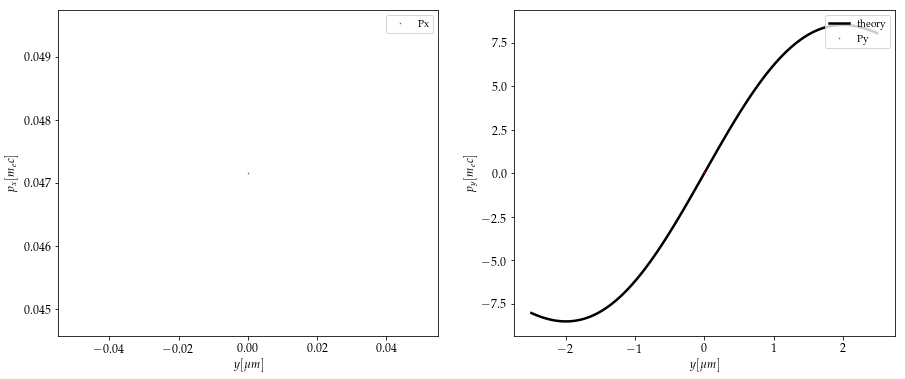

In [51]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
font = {'family' : 'helvetica',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
        }
part_number=1
nsteps=10001

insert1='./Data/'
insert_n='_0'
#t=np.loadtxt(insert+'t'+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
px1=np.loadtxt(insert1+'px'+insert_n+'.txt')
py1=np.loadtxt(insert1+'py'+insert_n+'.txt')
pz1=np.loadtxt(insert1+'pz'+insert_n+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn1=np.loadtxt(insert1+'radn'+insert_n+'.txt')
radt1=np.loadtxt(insert1+'radt'+insert_n+'.txt')
opt1=np.loadtxt(insert1+'opt'+insert_n+'.txt')
eta1=np.loadtxt(insert1+'eta'+insert_n+'.txt')

#t=np.reshape(t,(part_number,nsteps))
x=np.reshape(x1,(part_number,nsteps))
y=np.reshape(y1,(part_number,nsteps))
z=np.reshape(z1,(part_number,nsteps))
px=np.reshape(px1,(part_number,nsteps))
py=np.reshape(py1,(part_number,nsteps))
pz=np.reshape(pz1,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn1,(part_number,nsteps))
radt=np.reshape(radt1,(part_number,nsteps))
opt=np.reshape(opt1,(part_number,nsteps))
eta=np.reshape(eta1,(part_number,nsteps))



eta=1983.0
a_0=150
r_0=4.0
g_0=500.0


T_y=np.linspace(-2.5,2.5,100,endpoint=True)

n=1
plt.subplot(121)
plt.plot(y[:,0]/2/np.pi,px[:,-1],'or',markersize=0.5,linewidth=2.5,label='Px')
plt.legend(loc='upper right')
#plt.xlim(93*2*np.pi,107*2*np.pi)
#plt.ylim(-50,50)
plt.xlabel('$y [\mu m]$',fontdict=font)
plt.ylabel('$p_x [m_ec]$',fontdict=font)
plt.xticks(fontsize=12); plt.yticks(fontsize=12);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(122)
from sympy import integrate,sin,exp  
#from sympy.abc import x
#int=integrate((sin(x))**2*exp(-2*x**2/(3*2*np.pi)**2),(x,-10*2*np.pi,10*2*np.pi))

T_y=np.linspace(-2.5,2.5,100,endpoint=True)
T_py=a_0**2*5*T_y*np.exp(-2*T_y**2/r_0**2)/(2*g_0*r_0**2)#*11.6/(4*np.pi)
plt.plot(T_y,T_py,'-k',linewidth=2.5,label='theory')
plt.plot(y[:,0]/2/np.pi,py[:,-1],'or',markersize=0.5,linewidth=2.5,label='Py')
plt.legend(loc='upper right')
#plt.xlim(93*2*np.pi,107*2*np.pi)
#plt.ylim(-50,50)
plt.xlabel('$y [\mu m]$',fontdict=font)
plt.ylabel('$p_y [m_ec]$',fontdict=font)
plt.xticks(fontsize=12); plt.yticks(fontsize=12);

#plt.figure(figsize=(100,100))
fig = plt.gcf()
fig.set_size_inches(15, 6)

[]


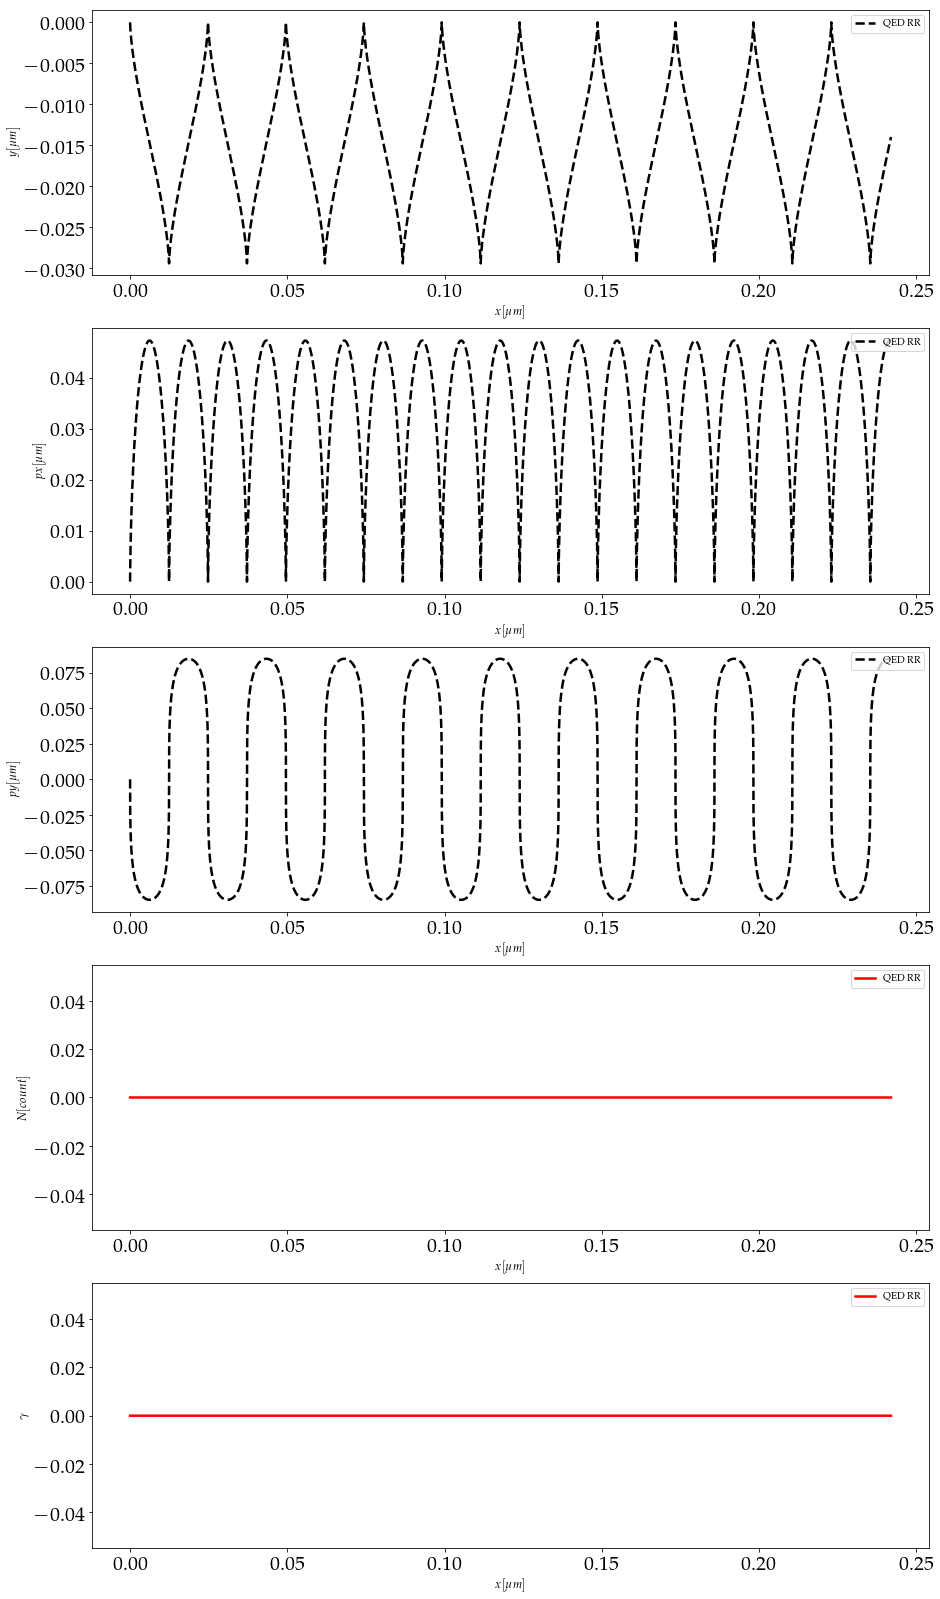

In [53]:
index=0

rrn=(radn[index,1:-1]-radn[index,0:-2])
rrt=(radt[index,1:-1]-radt[index,0:-2])
which=np.where(rrt >= 1)
rrn=rrn[which]
rrt=rrt[which]

plt.subplot(7,1,1)
#plt.scatter(x[index,which]/2/np.pi, y[index,which]/2/np.pi, c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi,y[index,:]/2/np.pi,'--k',linewidth=2.5,label='QED RR')
plt.legend(loc='upper right')
#plt.colorbar()
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$y [\mu m]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(7,1,2)
#plt.scatter(x[index,which]/2/np.pi, px[index,which], c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi,px[index,:],'--k',linewidth=2.5,label='QED RR')
plt.legend(loc='upper right')
#plt.colorbar()
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$px [\mu m]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(7,1,3)
#plt.scatter(x[index,which]/2/np.pi, py[index,which], c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi,py[index,:],'--k',linewidth=2.5,label='QED RR')
plt.legend(loc='upper right')
#plt.colorbar()
#plt.xlim(46,54)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$py [\mu m]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(7,1,4)
#plt.scatter(x[index,which]/2/np.pi, radn[index,which], c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi,radn[index,:],'-r',linewidth=2.5,label='QED RR')
plt.legend(loc='upper right')
#plt.colorbar()
#plt.xlim(47,53)
#plt.ylim(-1.5,-0.5)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$N [count]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(7,1,5)
#plt.scatter(x[index,which]/2/np.pi, radt[index,which], c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi,radt[index,:],'-r',linewidth=2.5,label='QED RR')
plt.legend(loc='upper right')
#plt.colorbar()
#plt.xlim(47,53)
#plt.ylim(-1.5,-0.5)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$\gamma$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

#plt.show()
#plt.figure(figsize=(100,100))
fig = plt.gcf()
fig.set_size_inches(15, 40)
np.max(radn[index,1:-1]-radn[index,0:-2])
np.max(radt[index,1:-1]-radt[index,0:-2])
print(rrt)

In [23]:
np.shape(px)

(100, 2001)

In [16]:
x

array([[ 125.663706,  125.663706,  125.663706, ...,  125.762442,
         125.762442,  125.762442],
       [ 125.663706,  125.663706,  125.663706, ...,  125.762442,
         125.762442,  125.762442],
       [ 125.663706,  125.663706,  125.663706, ...,  125.762442,
         125.762442,  125.762442],
       ..., 
       [ 125.663706,  125.663706,  125.663706, ...,  125.762442,
         125.762442,  125.762442],
       [ 125.663706,  125.663706,  125.663706, ...,  125.762442,
         125.762442,  125.762442],
       [ 125.663706,  125.663706,  125.663706, ...,  125.762442,
         125.762442,  125.762442]])

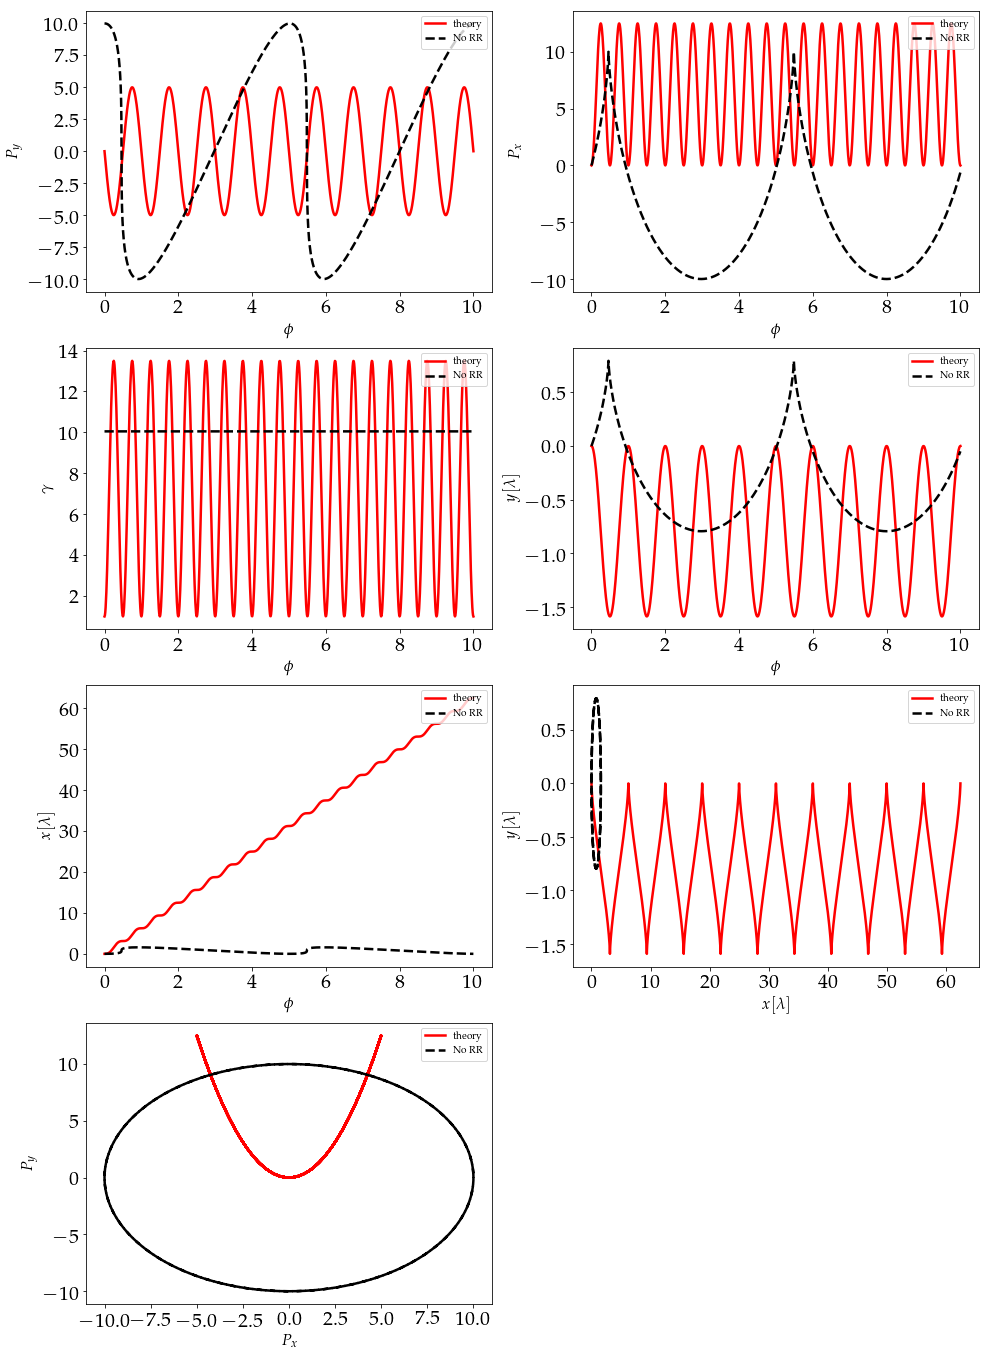

In [94]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

part_number=1
nsteps=10001

insert1='./Data/'
insert_n='_0'
t1=np.loadtxt(insert1+'t'+insert_n+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
px1=np.loadtxt(insert1+'px'+insert_n+'.txt')
py1=np.loadtxt(insert1+'py'+insert_n+'.txt')
pz1=np.loadtxt(insert1+'pz'+insert_n+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn1=np.loadtxt(insert1+'radn'+insert_n+'.txt')
radt1=np.loadtxt(insert1+'radt'+insert_n+'.txt')
opt1=np.loadtxt(insert1+'opt'+insert_n+'.txt')
eta1=np.loadtxt(insert1+'eta'+insert_n+'.txt')

t=np.reshape(t1,(part_number,nsteps))
x=np.reshape(x1,(part_number,nsteps))
y=np.reshape(y1,(part_number,nsteps))
z=np.reshape(z1,(part_number,nsteps))
px=np.reshape(px1,(part_number,nsteps))
py=np.reshape(py1,(part_number,nsteps))
pz=np.reshape(pz1,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn1,(part_number,nsteps))
radt=np.reshape(radt1,(part_number,nsteps))
opt=np.reshape(opt1,(part_number,nsteps))
eta=np.reshape(eta1,(part_number,nsteps))

index=0
plt.subplot(5,2,1)
a0=5.0
T_phi=np.linspace(0.0,10.0,1000,endpoint=True)
T_py=a0*np.cos(T_phi*2*np.pi+0.5*np.pi)
plt.plot(T_phi,T_py,'-r',linewidth=2.5,label='theory')
#plt.scatter(x[index,which]/2/np.pi, y[index,which]/2/np.pi, c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot((t[index,:]-x[index,:])/2/np.pi,py[index,:],'--k',linewidth=2.5,label='No RR')
plt.legend(loc='upper right')
#plt.colorbar()
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$\phi$',fontdict=font)
plt.ylabel('$P_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(5,2,2)
T_phi=np.linspace(0.0,10.0,1000,endpoint=True)
T_px=a0**2*np.cos(T_phi*2*np.pi+0.5*np.pi)**2/2.0
plt.plot(T_phi,T_px,'-r',linewidth=2.5,label='theory')
#plt.scatter(x[index,which]/2/np.pi, y[index,which]/2/np.pi, c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot((t[index,:]-x[index,:])/2/np.pi,px[index,:],'--k',linewidth=2.5,label='No RR')
plt.legend(loc='upper right')
#plt.colorbar()
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$\phi$',fontdict=font)
plt.ylabel('$P_x$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(5,2,3)
T_phi=np.linspace(0.0,10.0,1000,endpoint=True)
T_g=a0**2*np.cos(T_phi*2*np.pi+0.5*np.pi)**2/2.0+1.0
plt.plot(T_phi,T_g,'-r',linewidth=2.5,label='theory')
#plt.scatter(x[index,which]/2/np.pi, y[index,which]/2/np.pi, c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot((t[index,:]-x[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
plt.legend(loc='upper right')
#plt.colorbar()
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$\phi$',fontdict=font)
plt.ylabel('$\gamma$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(5,2,4)
T_phi=np.linspace(0.0,10.0,1000,endpoint=True)
T_y=a0*np.sin(T_phi*2*np.pi+0.5*np.pi)-a0
plt.plot(T_phi,T_y/2/np.pi,'-r',linewidth=2.5,label='theory')
#plt.scatter(x[index,which]/2/np.pi, y[index,which]/2/np.pi, c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot((t[index,:]-x[index,:])/2/np.pi,y[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
plt.legend(loc='upper right')
#plt.colorbar()
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$\phi$',fontdict=font)
plt.ylabel('$y [\lambda]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(5,2,5)
T_phi=np.linspace(0.0,10.0,1000,endpoint=True)
T_x=a0**2/4*(T_phi*2*np.pi+0.5*np.sin(2*(T_phi*2*np.pi+0.5*np.pi)))#-a0**2/4*np.pi/2
plt.plot(T_phi,T_x/2/np.pi,'-r',linewidth=2.5,label='theory')
#plt.scatter(x[index,which]/2/np.pi, y[index,which]/2/np.pi, c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot((t[index,:]-x[index,:])/2/np.pi,x[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
plt.legend(loc='upper right')
#plt.colorbar()
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$\phi$',fontdict=font)
plt.ylabel('$x [\lambda]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(5,2,6)
T_phi=np.linspace(0.0,10.0,1000,endpoint=True)
T_x=a0**2/4*(T_phi*2*np.pi+0.5*np.sin(2*(T_phi*2*np.pi+0.5*np.pi)))#-a0**2/4*np.pi/2
plt.plot(T_x/2/np.pi,T_y/2/np.pi,'-r',linewidth=2.5,label='theory')
#plt.scatter(x[index,which]/2/np.pi, y[index,which]/2/np.pi, c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot((x[index,:])/2/np.pi,y[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
plt.legend(loc='upper right')
#plt.colorbar()
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$x [\lambda]$',fontdict=font)
plt.ylabel('$y [\lambda]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(5,2,7)
#T_phi=np.linspace(0.0,10.0,1000,endpoint=True)
#T_x=a0**2/4*(T_phi*2*np.pi+0.5*np.sin(2*(T_phi*2*np.pi+0.5*np.pi)))#-a0**2/4*np.pi/2
plt.plot(T_py,T_px,'-r',linewidth=2.5,label='theory')
#plt.scatter(x[index,which]/2/np.pi, y[index,which]/2/np.pi, c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot((py[index,:]),px[index,:],'--k',linewidth=2.5,label='No RR')
plt.legend(loc='upper right')
#plt.colorbar()
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$P_x$',fontdict=font)
plt.ylabel('$P_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)




fig = plt.gcf()
fig.set_size_inches(16, 30)
#fig.set_size_inches(5, 4.5)
#fig.savefig('planew_a='+str(a0)+'.png',format='png',dpi=160)
#plt.close("all")

[  0.00000000e+00   6.28300000e-03   8.28413500e+00   8.29041800e+00
   8.29670100e+00   8.30298400e+00   1.65776950e+01   1.65839780e+01
   1.65902610e+01   1.65965440e+01   2.48743970e+01   2.48806800e+01
   2.48869630e+01   3.31679570e+01   3.31742400e+01   3.31805230e+01
   4.14615170e+01   4.14678000e+01   4.14740830e+01   4.97519350e+01
   4.97582180e+01   4.97645010e+01   5.80454950e+01   5.80517780e+01
   5.80580610e+01   6.63390550e+01   6.63453380e+01   6.63516210e+01
   7.46326150e+01   7.46388980e+01   7.46451810e+01   8.29261750e+01
   8.29324580e+01   8.29387410e+01   9.12197350e+01   9.12260180e+01
   9.12323010e+01   9.95132950e+01   9.95195780e+01   9.95258610e+01
   1.07806855e+02   1.07813138e+02   1.07819421e+02   1.16100415e+02
   1.16106698e+02   1.16112981e+02   1.24393975e+02   1.24400258e+02
   1.24406541e+02   1.32687535e+02   1.32693818e+02   1.32700101e+02
   1.40981095e+02   1.40987378e+02   1.40993661e+02   1.49274655e+02
   1.49280938e+02   1.49287221e+02

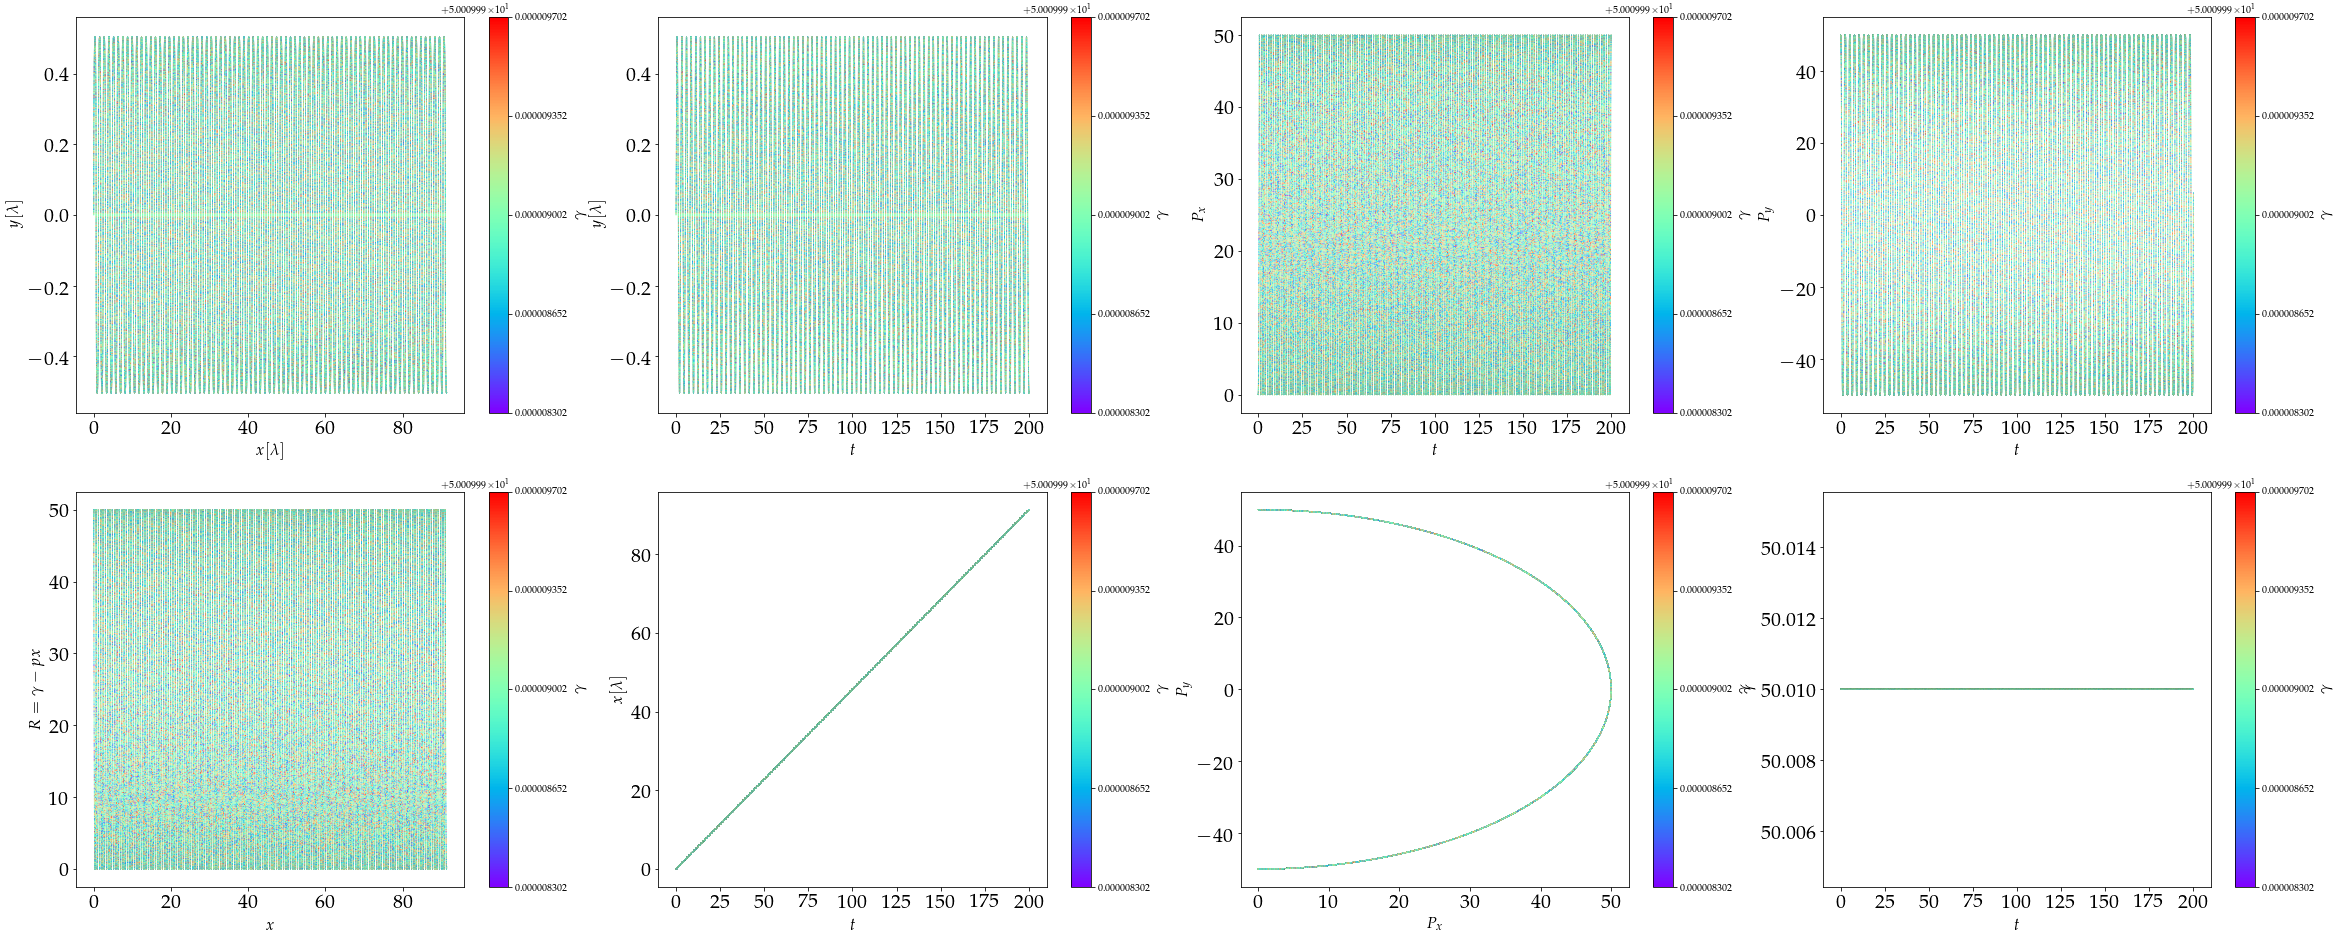

In [14]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

part_number=1
nsteps=200007

insert1='./Data/'
insert_n='_0'
t1=np.loadtxt(insert1+'t'+insert_n+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
px1=np.loadtxt(insert1+'px'+insert_n+'.txt')
py1=np.loadtxt(insert1+'py'+insert_n+'.txt')
pz1=np.loadtxt(insert1+'pz'+insert_n+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn1=np.loadtxt(insert1+'radn'+insert_n+'.txt')
radt1=np.loadtxt(insert1+'radt'+insert_n+'.txt')
opt1=np.loadtxt(insert1+'opt'+insert_n+'.txt')
eta1=np.loadtxt(insert1+'eta'+insert_n+'.txt')

t=np.reshape(t1,(part_number,nsteps))
x=np.reshape(x1,(part_number,nsteps))
y=np.reshape(y1,(part_number,nsteps))
z=np.reshape(z1,(part_number,nsteps))
px=np.reshape(px1,(part_number,nsteps))
py=np.reshape(py1,(part_number,nsteps))
pz=np.reshape(pz1,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn1,(part_number,nsteps))
radt=np.reshape(radt1,(part_number,nsteps))
opt=np.reshape(opt1,(part_number,nsteps))
eta=np.reshape(eta1,(part_number,nsteps))

gamma=np.sqrt(px**2+py**2+1)

R_dep=gamma-px

index=0
plt.subplot(2,4,1)
a0=10.0
plt.scatter(x[index,:]/2/np.pi,y[index,:]/2/np.pi, c=gamma[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((x[index,:])/2/np.pi,y[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$x [\lambda]$',fontdict=font)
plt.ylabel('$y [\lambda]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)


plt.subplot(2,4,2)
plt.scatter(t[index,:]/2/np.pi,y[index,:]/2/np.pi, c=gamma[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,y[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$t$',fontdict=font)
plt.ylabel('$y [\lambda]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,4,3)
plt.scatter(t[index,:]/2/np.pi,px[index,:], c=gamma[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$t$',fontdict=font)
plt.ylabel('$P_x$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)



plt.subplot(2,4,4)
plt.scatter(t[index,:]/2/np.pi,py[index,:], c=gamma[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$t$',fontdict=font)
plt.ylabel('$P_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)


plt.subplot(2,4,5)
plt.scatter(x[index,:]/2/np.pi,gamma[index,:]-px[index,:], c=gamma[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((x[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1)-px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$x$',fontdict=font)
plt.ylabel('$R=\gamma-px$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)




plt.subplot(2,4,6)
plt.scatter(t[index,:]/2/np.pi,x[index,:]/2/np.pi, c=gamma[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,x[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$t$',fontdict=font)
plt.ylabel('$x [\lambda]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)





plt.subplot(2,4,7)
plt.scatter(px[index,:],py[index,:], c=gamma[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((py[index,:]),px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$P_x$',fontdict=font)
plt.ylabel('$P_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,4,8)
plt.scatter(t[index,:]/2/np.pi,gamma[index,:], c=gamma[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$t$',fontdict=font)
plt.ylabel('$\gamma$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

print(t[np.where(abs(y) < 1.0e-2)])

fig = plt.gcf()
fig.set_size_inches(40, 16)
#fig.set_size_inches(5, 4.5)
#fig.savefig('a=100_b=0.03_py=80.png',format='png',dpi=160)
#plt.close("all")

(array([     0,   2614,  13056,  28712,  28713,  73201,  78766,  82357,
        87874,  98429, 106259, 117021, 129435, 129436, 139499, 149253,
       160201, 169553, 180477, 180478, 191840, 200687, 211242, 223498,
       223499, 233202, 242850, 255342, 266808, 278205, 286862, 298776,
       298777, 309507, 329769, 340417, 350295, 360886, 370768, 381267,
       391076, 401891, 412831, 422450, 433139, 442793, 453448, 453449,
       464983, 473611, 479069, 491118, 501331, 508488, 520449, 532425,
       546447, 565808, 577886, 588459, 597570, 608732, 629046, 629047,
       640685, 649425, 660750, 675247, 687187, 706054, 717692, 728599,
       741489, 741490, 753516, 763378, 771655, 780900, 780901, 792090,
       801423, 809835, 820746, 834336, 849118, 864209, 864210, 881671,
       881672, 896740, 911946, 925757, 937549, 950238, 963015, 972508,
       982165, 994402]),)


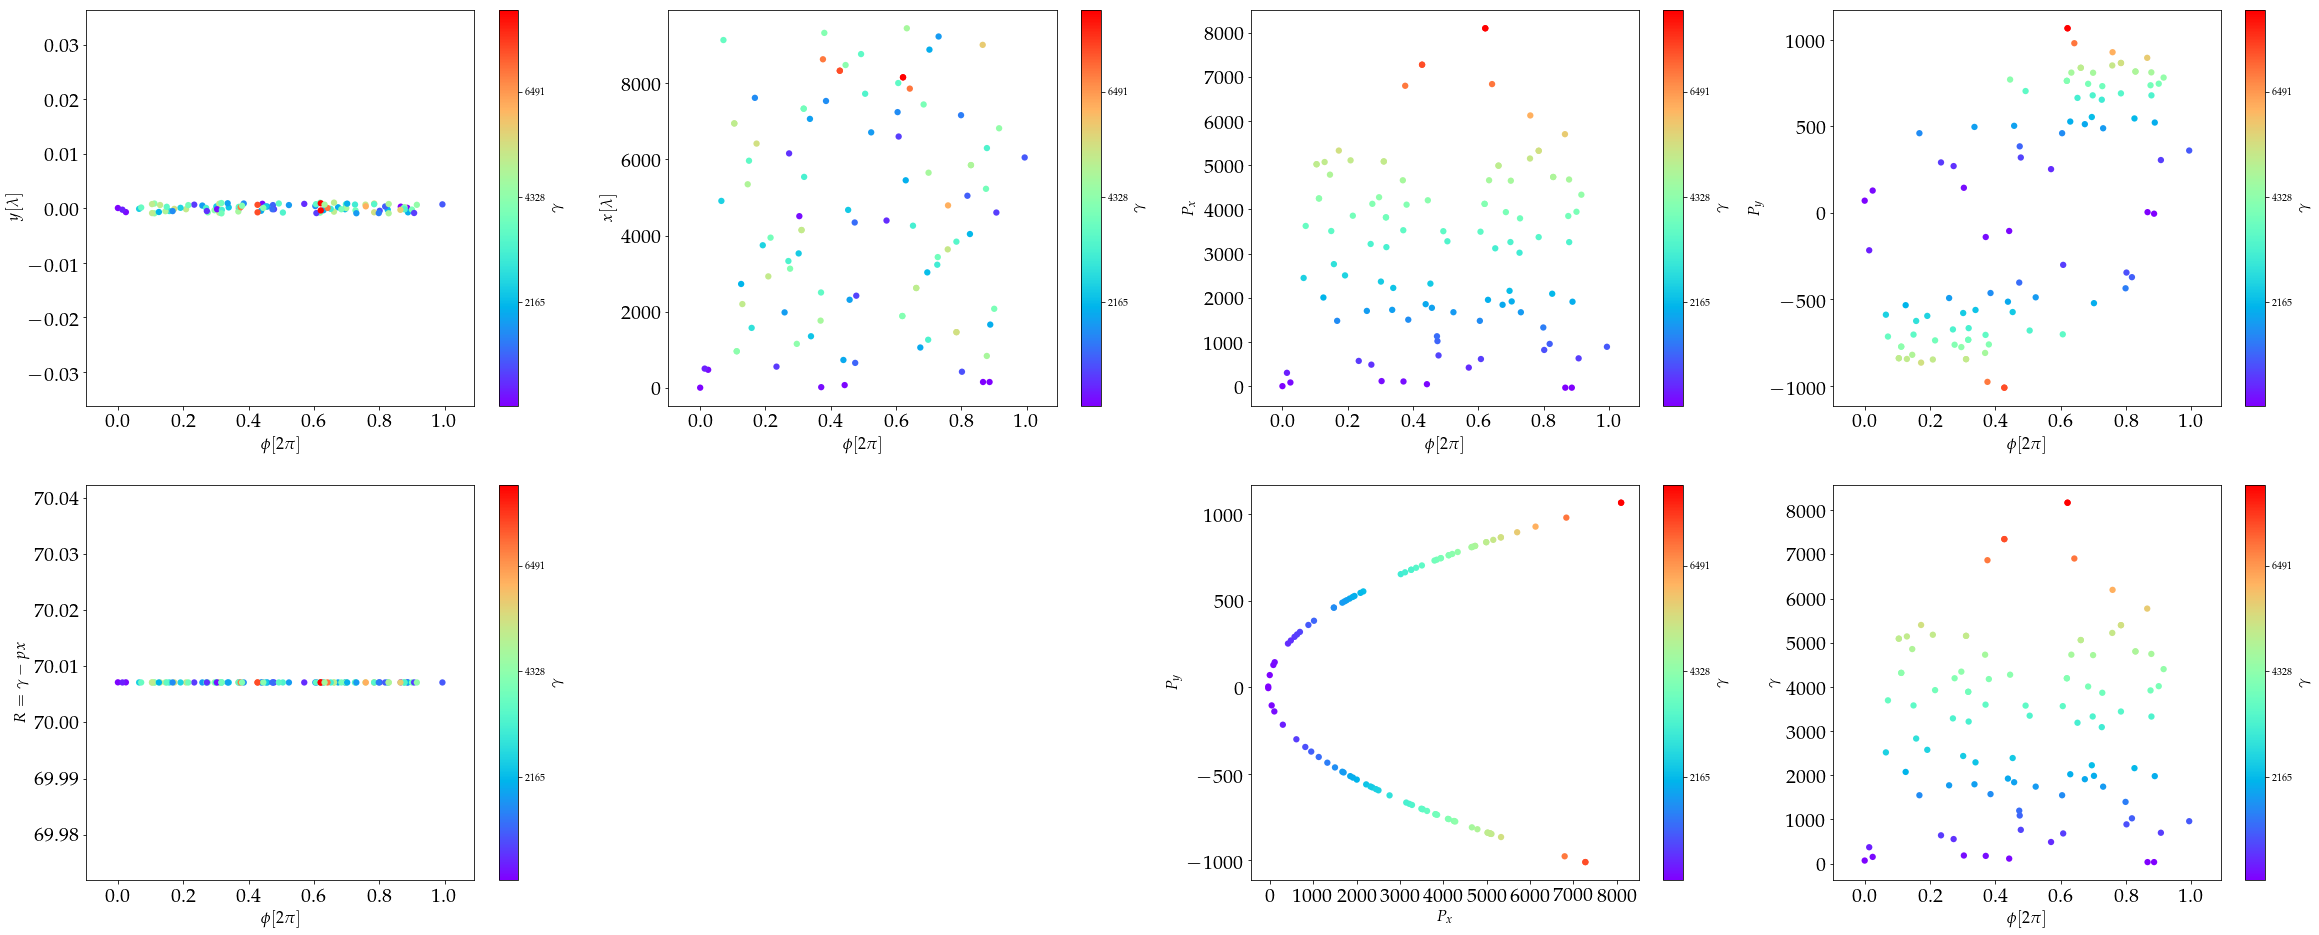

In [57]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

part_number=1
nsteps=1000030

insert1='./Data/'
insert_n='_0'
t1=np.loadtxt(insert1+'t'+insert_n+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
px1=np.loadtxt(insert1+'px'+insert_n+'.txt')
py1=np.loadtxt(insert1+'py'+insert_n+'.txt')
pz1=np.loadtxt(insert1+'pz'+insert_n+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn1=np.loadtxt(insert1+'radn'+insert_n+'.txt')
radt1=np.loadtxt(insert1+'radt'+insert_n+'.txt')
opt1=np.loadtxt(insert1+'opt'+insert_n+'.txt')
eta1=np.loadtxt(insert1+'eta'+insert_n+'.txt')

t=np.reshape(t1,(part_number,nsteps))
x=np.reshape(x1,(part_number,nsteps))
y=np.reshape(y1,(part_number,nsteps))
z=np.reshape(z1,(part_number,nsteps))
px=np.reshape(px1,(part_number,nsteps))
py=np.reshape(py1,(part_number,nsteps))
pz=np.reshape(pz1,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn1,(part_number,nsteps))
radt=np.reshape(radt1,(part_number,nsteps))
opt=np.reshape(opt1,(part_number,nsteps))
eta=np.reshape(eta1,(part_number,nsteps))

gamma=np.sqrt(px**2+py**2+1)

R_dep=gamma-px

index=0
index2=np.where(abs(y[index,:]/2/np.pi-0.0) < 1.0e-3)
plt.subplot(2,4,1)
a0=10.0
plt.scatter((t[index,index2]-x[index,index2])/2/np.pi%1, y[index,index2]/2/np.pi, c=gamma[index,index2], s=40, cmap='rainbow', edgecolors='None')
#plt.plot((x[index,:])/2/np.pi,y[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$y [\lambda]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,4,2)
plt.scatter((t[index,index2]-x[index,index2])/2/np.pi%1,x[index,index2]/2/np.pi, c=gamma[index,index2], s=40, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,x[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$x [\lambda]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,4,3)
plt.scatter((t[index,index2]-x[index,index2])/2/np.pi%1, px[index,index2], c=gamma[index,index2], s=40, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$P_x$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,4,4)
plt.scatter((t[index,index2]-x[index,index2])/2/np.pi%1, py[index,index2], c=gamma[index,index2], s=40, cmap='rainbow', edgecolors='None')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$P_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)


plt.subplot(2,4,5)
plt.scatter((t[index,index2]-x[index,index2])/2/np.pi%1, gamma[index,index2]-px[index,index2], c=gamma[index,index2], s=40, cmap='rainbow', edgecolors='None')
#plt.plot((x[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1)-px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$R=\gamma-px$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)





plt.subplot(2,4,7)
plt.scatter(px[index,index2],py[index,index2], c=gamma[index,index2], s=40, cmap='rainbow', edgecolors='None')
#plt.plot((py[index,:]),px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$P_x$',fontdict=font)
plt.ylabel('$P_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,4,8)
plt.scatter((t[index,index2]-x[index,index2])/2/np.pi%1,gamma[index,index2], c=gamma[index,index2], s=40, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
print(index2)

fig = plt.gcf()
fig.set_size_inches(40, 16)
#fig.set_size_inches(5, 4.5)
#fig.savefig('a=100_b=0.03_py=80.png',format='png',dpi=160)
#plt.close("all")

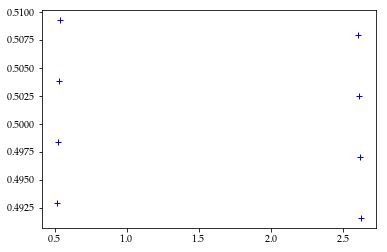

In [47]:
x=np.linspace(0,6.28,1000)
y=np.sin(x)
n1=np.where(abs(y-0.5) < 1.0e-2)
plt.plot(x[n1],y[n1],'b+')

/Users/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in true_divide


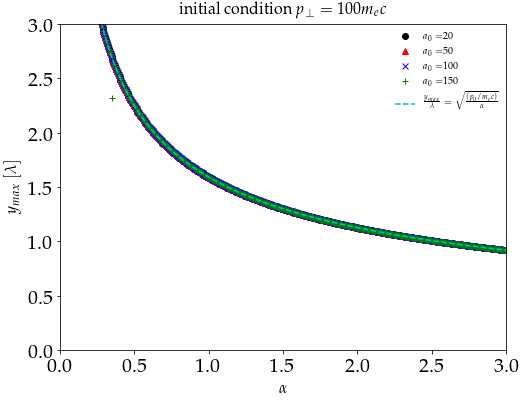

In [74]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.mlab as mlab
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

enhance=np.loadtxt('./txt/enhance.txt')
axis_b=np.loadtxt('./txt/axis_b.txt')
axis_a=np.loadtxt('./txt/axis_a.txt')
ymax=np.loadtxt('./txt/ymax.txt')
bchf=np.loadtxt('./txt/bchf.txt')


#T_phi=np.linspace(0.0,10.0,1000,endpoint=True)
#T_g=a0**2*np.cos(T_phi*2*np.pi+0.5*np.pi)**2/2.0+1.0
#plt.plot(T_phi,T_g,'-r',linewidth=2.5,label='theory')
#plt.scatter(x[index,which]/2/np.pi, y[index,which]/2/np.pi, c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot(axis_b,ymax[:,0],'ok',label=r'$a_0=$'+str(int(axis_a[0])))
plt.plot(axis_b,ymax[:,1],'^r',label=r'$a_0=$'+str(int(axis_a[1])))
plt.plot(axis_b,ymax[:,2],'xb',label=r'$a_0=$'+str(int(axis_a[2])))
plt.plot(axis_b,ymax[:,3],'+g',label=r'$a_0=$'+str(int(axis_a[3])))
x=np.linspace(0.00,3,500)
p0=100.0
y=(p0/x)**0.5/2/3.14159
plt.plot(x,y,'--c',linewidth=1.5,label=r'$\frac{y_{max}}{\lambda}=\sqrt{\frac{(p_0/m_ec)}{\alpha}}$')
plt.legend(loc='upper right',framealpha=0.0)

#plt.colorbar()
plt.xlim(0.00,3)
plt.ylim(0,3)
plt.xlabel(r'$\alpha$',fontdict=font)
plt.ylabel(r'$y_{max}\ [\lambda]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.title(r'initial condition $p_\perp=100m_ec$',fontdict=font)

fig = plt.gcf()
fig.set_size_inches(8, 6)
#fig.savefig('./txt/y_b.png',format='png',dpi=1280)
#plt.close("all")
#plt.show()

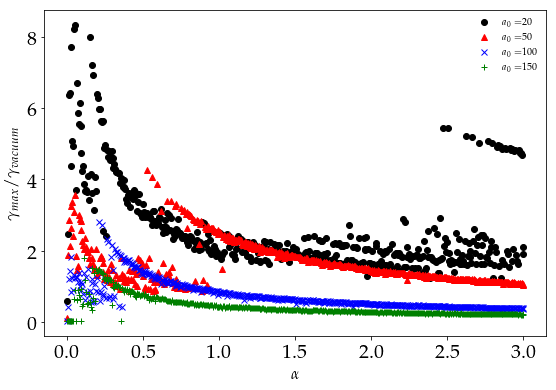

In [76]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.mlab as mlab
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

enhance=np.loadtxt('./txt/enhance.txt')
axis_b=np.loadtxt('./txt/axis_b.txt')
axis_a=np.loadtxt('./txt/axis_a.txt')
ymax=np.loadtxt('./txt/ymax.txt')
bchf=np.loadtxt('./txt/bchf.txt')


#T_phi=np.linspace(0.0,10.0,1000,endpoint=True)
#T_g=a0**2*np.cos(T_phi*2*np.pi+0.5*np.pi)**2/2.0+1.0
#plt.plot(T_phi,T_g,'-r',linewidth=2.5,label='theory')
#plt.scatter(x[index,which]/2/np.pi, y[index,which]/2/np.pi, c=rrt, s=500, cmap='rainbow', edgecolors='None')
#plt.plot(axis_b,enhance[:,0],'--b',linewidth=2.5,label=r'$a_0=$'+str(int(axis_a[0])))
#plt.plot(axis_b,enhance[:,1],'--r',linewidth=2.5,label=r'$a_0=$'+str(int(axis_a[1])))
#plt.plot(axis_b,enhance[:,2],'--k',linewidth=2.5,label=r'$a_0=$'+str(int(axis_a[2])))
#plt.plot(axis_b,enhance[:,3],'--g',linewidth=2.5,label=r'$a_0=$'+str(int(axis_a[3])))
plt.plot(axis_b,enhance[:,0],'ok',label=r'$a_0=$'+str(int(axis_a[0])))
plt.plot(axis_b,enhance[:,1],'^r',label=r'$a_0=$'+str(int(axis_a[1])))
plt.plot(axis_b,enhance[:,2],'xb',label=r'$a_0=$'+str(int(axis_a[2])))
plt.plot(axis_b,enhance[:,3],'+g',label=r'$a_0=$'+str(int(axis_a[3])))
x=np.linspace(0.0001,0.04,400)
y=(1/x)**0.5/2/3.14159
#plt.plot(x,y,'--c',linewidth=1.5,label=r'$y_{max}=1/\sqrt{\alpha}$')
plt.legend(loc='upper right',framealpha=0.0)


#plt.colorbar()
#plt.xlim(-0.001,0.04)
#plt.ylim(0,9.9)
plt.xlabel(r'$\alpha$',fontdict=font)
plt.ylabel(r'$\gamma_{max}/\gamma_{vacuum}$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);

fig = plt.gcf()
fig.set_size_inches(9, 6)
fig.savefig('./txt/enhance_b.png',format='png',dpi=1280)
#plt.close("all")
#plt.show()

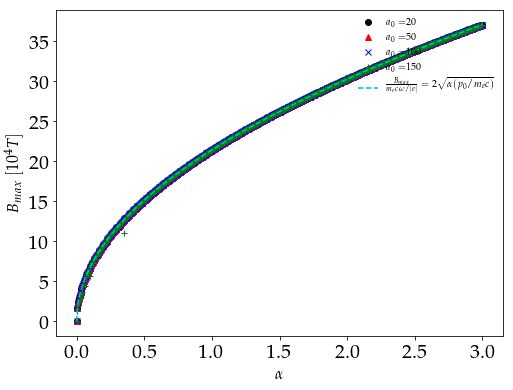

In [77]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.mlab as mlab
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

enhance=np.loadtxt('./txt/enhance.txt')
axis_b=np.loadtxt('./txt/axis_b.txt')
axis_a=np.loadtxt('./txt/axis_a.txt')
ymax=np.loadtxt('./txt/ymax.txt')
bchf=np.loadtxt('./txt/bchf.txt')*1.0700


#T_phi=np.linspace(0.0,10.0,1000,endpoint=True)
#T_g=a0**2*np.cos(T_phi*2*np.pi+0.5*np.pi)**2/2.0+1.0
#plt.plot(T_phi,T_g,'-r',linewidth=2.5,label='theory')
#plt.scatter(x[index,which]/2/np.pi, y[index,which]/2/np.pi, c=rrt, s=500, cmap='rainbow', edgecolors='None')
#plt.plot(axis_b,bchf[:,0],'--b',linewidth=2.5,label=r'$a_0=$'+str(int(axis_a[0])))
#plt.plot(axis_b,bchf[:,1],'--r',linewidth=2.5,label=r'$a_0=$'+str(int(axis_a[1])))
#plt.plot(axis_b,bchf[:,2],'--k',linewidth=2.5,label=r'$a_0=$'+str(int(axis_a[2])))
#plt.plot(axis_b,bchf[:,3],'--g',linewidth=2.5,label=r'$a_0=$'+str(int(axis_a[3])))
plt.plot(axis_b,bchf[:,0],'ok',label=r'$a_0=$'+str(int(axis_a[0])))
plt.plot(axis_b,bchf[:,1],'^r',label=r'$a_0=$'+str(int(axis_a[1])))
plt.plot(axis_b,bchf[:,2],'xb',label=r'$a_0=$'+str(int(axis_a[2])))
plt.plot(axis_b,bchf[:,3],'+g',label=r'$a_0=$'+str(int(axis_a[3])))
x=np.linspace(0,3,500)
p0=100.0
y=2.0*(x*p0)**0.5*1.0700
plt.plot(x,y,'--c',linewidth=1.5,label=r'$\frac{B_{max}}{m_ec\omega/|e|}=2\sqrt{\alpha (p_0/m_ec)}$')
plt.legend(loc='upper right',framealpha=0.0)


#plt.colorbar()
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\alpha$',fontdict=font)
plt.ylabel(r'$B_{max}\ [10^4T]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);

fig = plt.gcf()
fig.set_size_inches(8, 6)
fig.savefig('./txt/Bmax_b.png',format='png',dpi=1280)
#plt.close("all")
#plt.show()

In [22]:
9.1e-31*3e8*6.28*1e6/1.6e-19

10715.250000000002

In [69]:
100/3.14/2

15.92356687898089

In [78]:
10**(-1.5)

0.03162277660168379

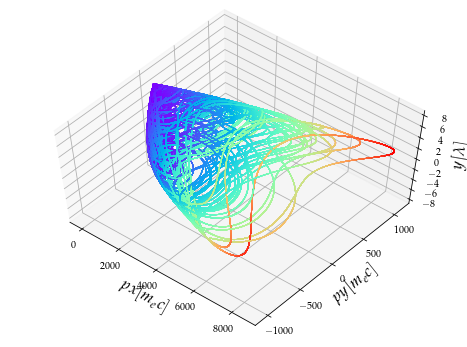

In [58]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

part_number=1
nsteps=1000030

insert1='./Data/'
insert_n='_0'
t1=np.loadtxt(insert1+'t'+insert_n+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
px1=np.loadtxt(insert1+'px'+insert_n+'.txt')
py1=np.loadtxt(insert1+'py'+insert_n+'.txt')
pz1=np.loadtxt(insert1+'pz'+insert_n+'.txt')

t=np.reshape(t1,(part_number,nsteps))
x=np.reshape(x1,(part_number,nsteps))
y=np.reshape(y1,(part_number,nsteps))
z=np.reshape(z1,(part_number,nsteps))
px=np.reshape(px1,(part_number,nsteps))
py=np.reshape(py1,(part_number,nsteps))
pz=np.reshape(pz1,(part_number,nsteps))

gamma=np.sqrt(px**2+py**2+1)

R_dep=gamma-px

index=0
a0=10.0

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(px[index,:],py[index,:],y[index,:]/2/np.pi, c=gamma[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((x[index,:])/2/np.pi,y[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#ax.colorbar()
#cbar=ax.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
#cbar.set_label(r'$\gamma$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
ax.set_xlabel('$px [m_ec]$',fontdict=font)
ax.set_ylabel('$py [m_ec]$',fontdict=font)
ax.set_zlabel('$y [\lambda]$',fontdict=font)
#ax.xticks(fontsize=20); ax.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
ax.view_init(elev=60., azim=-50)

fig = plt.gcf()
#fig.set_size_inches(40, 16)
fig.set_size_inches(8, 6)
#fig.savefig('a=100_b=0.03_py=80.png',format='png',dpi=160)
#plt.close("all")

SystemExit: 0

/Users/michael/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


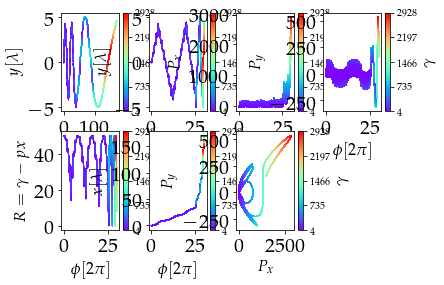

In [2]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

part_number=1
nsteps=200007

insert1='./Data/'
insert_n='_0'
t1=np.loadtxt(insert1+'t'+insert_n+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
px1=np.loadtxt(insert1+'px'+insert_n+'.txt')
py1=np.loadtxt(insert1+'py'+insert_n+'.txt')
pz1=np.loadtxt(insert1+'pz'+insert_n+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn1=np.loadtxt(insert1+'radn'+insert_n+'.txt')
radt1=np.loadtxt(insert1+'radt'+insert_n+'.txt')
opt1=np.loadtxt(insert1+'opt'+insert_n+'.txt')
eta1=np.loadtxt(insert1+'eta'+insert_n+'.txt')

t=np.reshape(t1,(part_number,nsteps))
x=np.reshape(x1,(part_number,nsteps))
y=np.reshape(y1,(part_number,nsteps))
z=np.reshape(z1,(part_number,nsteps))
px=np.reshape(px1,(part_number,nsteps))
py=np.reshape(py1,(part_number,nsteps))
pz=np.reshape(pz1,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn1,(part_number,nsteps))
radt=np.reshape(radt1,(part_number,nsteps))
opt=np.reshape(opt1,(part_number,nsteps))
eta=np.reshape(eta1,(part_number,nsteps))

gamma=np.sqrt(px**2+py**2+1)

R_dep=gamma-px

index=0
plt.subplot(2,4,1)
a0=10.0
plt.scatter(x[index,:]/2/np.pi,y[index,:]/2/np.pi, c=gamma[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((x[index,:])/2/np.pi,y[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$x [\lambda]$',fontdict=font)
plt.ylabel('$y [\lambda]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)


plt.subplot(2,4,2)
plt.scatter(t[index,:]/2/np.pi-x[index,:]/2/np.pi,y[index,:]/2/np.pi, c=gamma[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,y[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$\phi [2\pi]$',fontdict=font)
plt.ylabel('$y [\lambda]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,4,3)
plt.scatter(t[index,:]/2/np.pi-x[index,:]/2/np.pi,px[index,:], c=gamma[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$\phi [2\pi]$',fontdict=font)
plt.ylabel('$P_x$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)



plt.subplot(2,4,4)
plt.scatter(t[index,:]/2/np.pi-x[index,:]/2/np.pi,py[index,:], c=gamma[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$\phi [2\pi]$',fontdict=font)
plt.ylabel('$P_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)


plt.subplot(2,4,5)
plt.scatter(t[index,:]/2/np.pi-x[index,:]/2/np.pi,gamma[index,:]-px[index,:], c=gamma[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((x[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1)-px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$\phi [2\pi]$',fontdict=font)
plt.ylabel('$R=\gamma-px$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)




plt.subplot(2,4,6)
plt.scatter(t[index,:]/2/np.pi-x[index,:]/2/np.pi,x[index,:]/2/np.pi, c=gamma[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,x[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$\phi [2\pi]$',fontdict=font)
plt.ylabel('$x [\lambda]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)





plt.subplot(2,4,7)
plt.scatter(px[index,:],py[index,:], c=gamma[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((py[index,:]),px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$P_x$',fontdict=font)
plt.ylabel('$P_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,4,8)
plt.scatter(t[index,:]/2/np.pi-x[index,:]/2/np.pi,gamma[index,:], c=gamma[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma[index,:]), np.max(gamma[index,:]), 5))
cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$\phi [2\pi]$',fontdict=font)
plt.ylabel('$\gamma$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)


fig = plt.gcf()
fig.set_size_inches(40, 16)
#fig.set_size_inches(5, 4.5)
#fig.savefig('single_a=50_p=50_alpha=0.1.png',format='png',dpi=160)
#plt.close("all")

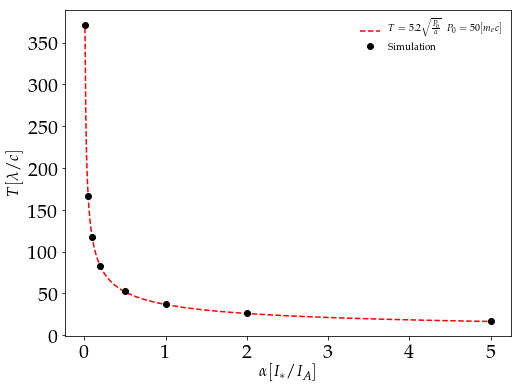

In [22]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.mlab as mlab
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

P0=50.0
alpha=np.linspace(0.01,5.0,500)
T=5.2*(P0/alpha)**0.5


plt.plot(alpha,T,'--r',linewidth=1.5,label=r'$T=5.2\sqrt{\frac{P_0}{\alpha}}\ \ P_0=50[m_ec]$')
x=np.array([0.01,0.05,0.1,0.2,0.5,1.0,2.0,5.0])
y=np.array([371,166,117,83.0,52.4,37.1,26.2,16.6])
plt.plot(x,y,'ok',label=r'Simulation')

plt.legend(loc='upper right',framealpha=0.0)


#plt.colorbar()
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\alpha [I_*/I_A]$',fontdict=font)
plt.ylabel(r'$T [\lambda/c]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);

fig = plt.gcf()
fig.set_size_inches(8, 6)
fig.savefig('./T_b_P0=50.png',format='png',dpi=1280)
#plt.close("all")
#plt.show()

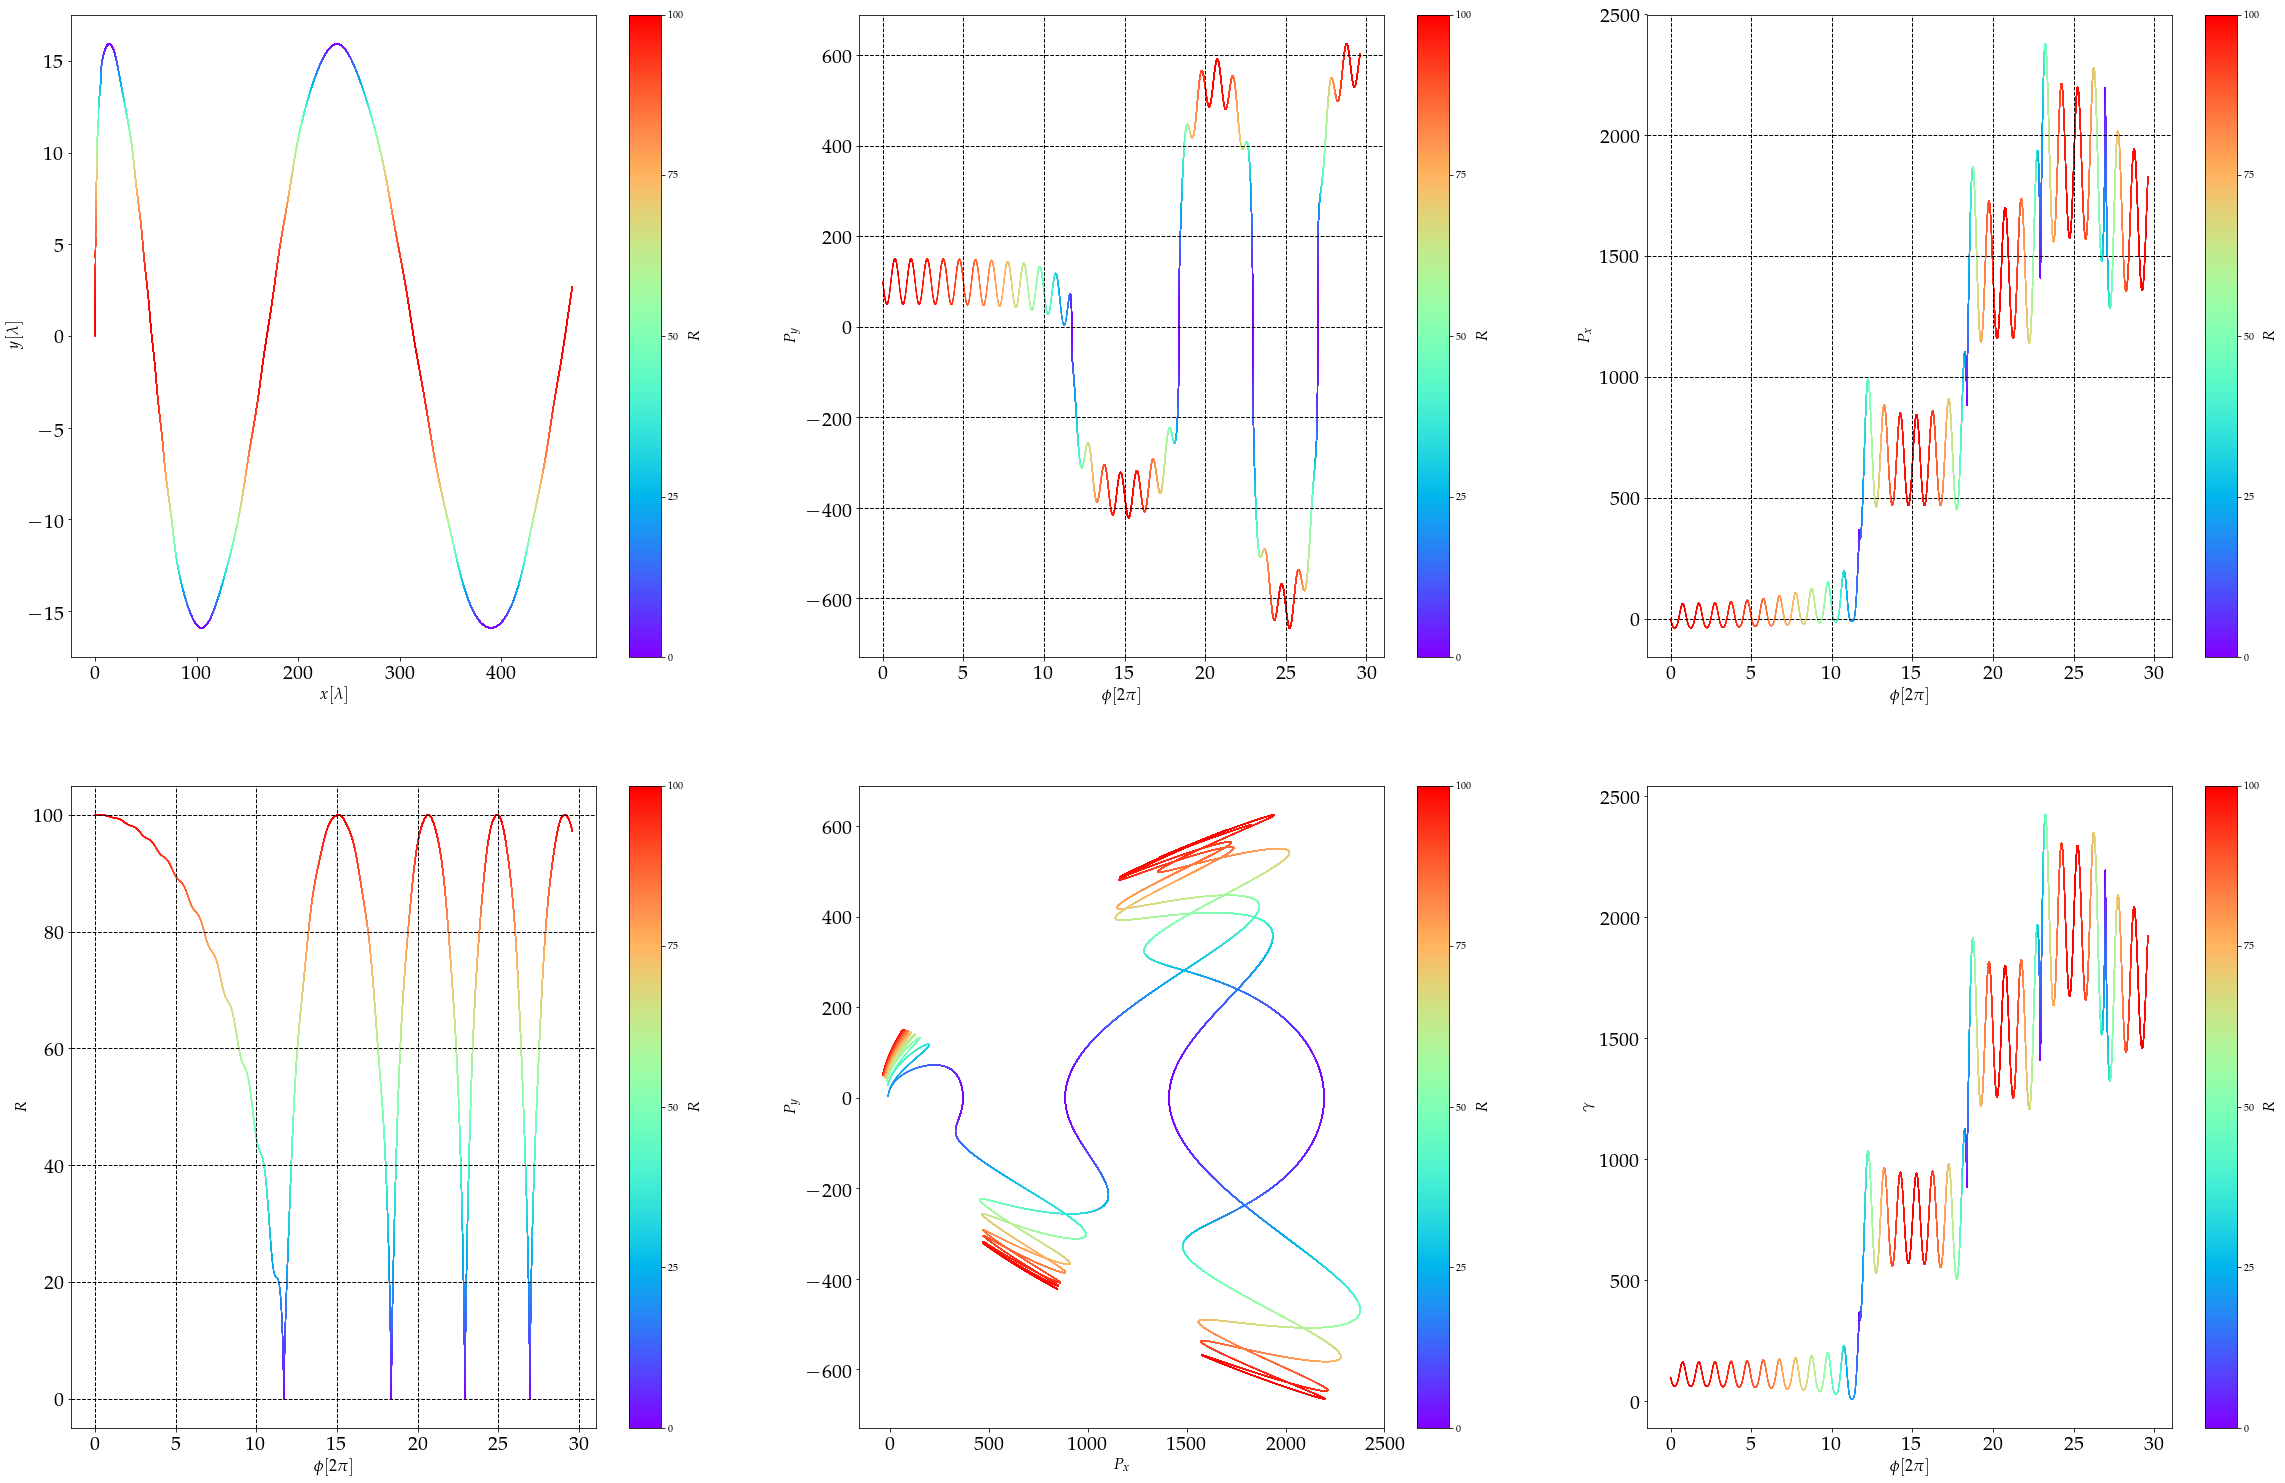

In [2]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

part_number=1
nsteps=500015

insert1='./Data/'
insert_n='_0'
t1=np.loadtxt(insert1+'t'+insert_n+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
px1=np.loadtxt(insert1+'px'+insert_n+'.txt')
py1=np.loadtxt(insert1+'py'+insert_n+'.txt')
pz1=np.loadtxt(insert1+'pz'+insert_n+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn1=np.loadtxt(insert1+'radn'+insert_n+'.txt')
radt1=np.loadtxt(insert1+'radt'+insert_n+'.txt')
opt1=np.loadtxt(insert1+'opt'+insert_n+'.txt')
eta1=np.loadtxt(insert1+'eta'+insert_n+'.txt')

t=np.reshape(t1,(part_number,nsteps))
x=np.reshape(x1,(part_number,nsteps))
y=np.reshape(y1,(part_number,nsteps))
z=np.reshape(z1,(part_number,nsteps))
px=np.reshape(px1,(part_number,nsteps))
py=np.reshape(py1,(part_number,nsteps))
pz=np.reshape(pz1,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn1,(part_number,nsteps))
radt=np.reshape(radt1,(part_number,nsteps))
opt=np.reshape(opt1,(part_number,nsteps))
eta=np.reshape(eta1,(part_number,nsteps))

gamma=np.sqrt(px**2+py**2+1)

R_dep=gamma-px

index=0
#index2=np.where(abs(y[index,:]/2/np.pi-0.0) < 1.0e-3)
plt.subplot(2,3,1)
a0=10.0
plt.scatter(x[index,:]/2/np.pi, y[index,:]/2/np.pi, c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((x[index,:])/2/np.pi,y[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$x [\lambda]$',fontdict=font)
plt.ylabel(r'$y [\lambda]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,2)
plt.scatter((t[index,:]-x[index,:])/2/np.pi,py[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,x[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
plt.grid(color='k', linestyle='--', linewidth=1)
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$P_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,3)
plt.scatter((t[index,:]-x[index,:])/2/np.pi,px[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
plt.grid(color='k', linestyle='--', linewidth=1)
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$P_x$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,4)
plt.scatter((t[index,:]-x[index,:])/2/np.pi, R_dep[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.legend(loc='upper right')
#plt.colorbar()
plt.grid(color='k', linestyle='--', linewidth=1)
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$R$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)


plt.subplot(2,3,5)
plt.scatter(px[index,:],py[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((py[index,:]),px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$P_x$',fontdict=font)
plt.ylabel('$P_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,6)
plt.scatter((t[index,:]-x[index,:])/2/np.pi,gamma[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
#print(index2)

fig = plt.gcf()
fig.set_size_inches(40, 26)
#fig.set_size_inches(5, 4.5)
#fig.savefig('./summary/a=0_b=0.01_py=100.png',format='png',dpi=1280)
#plt.close("all")

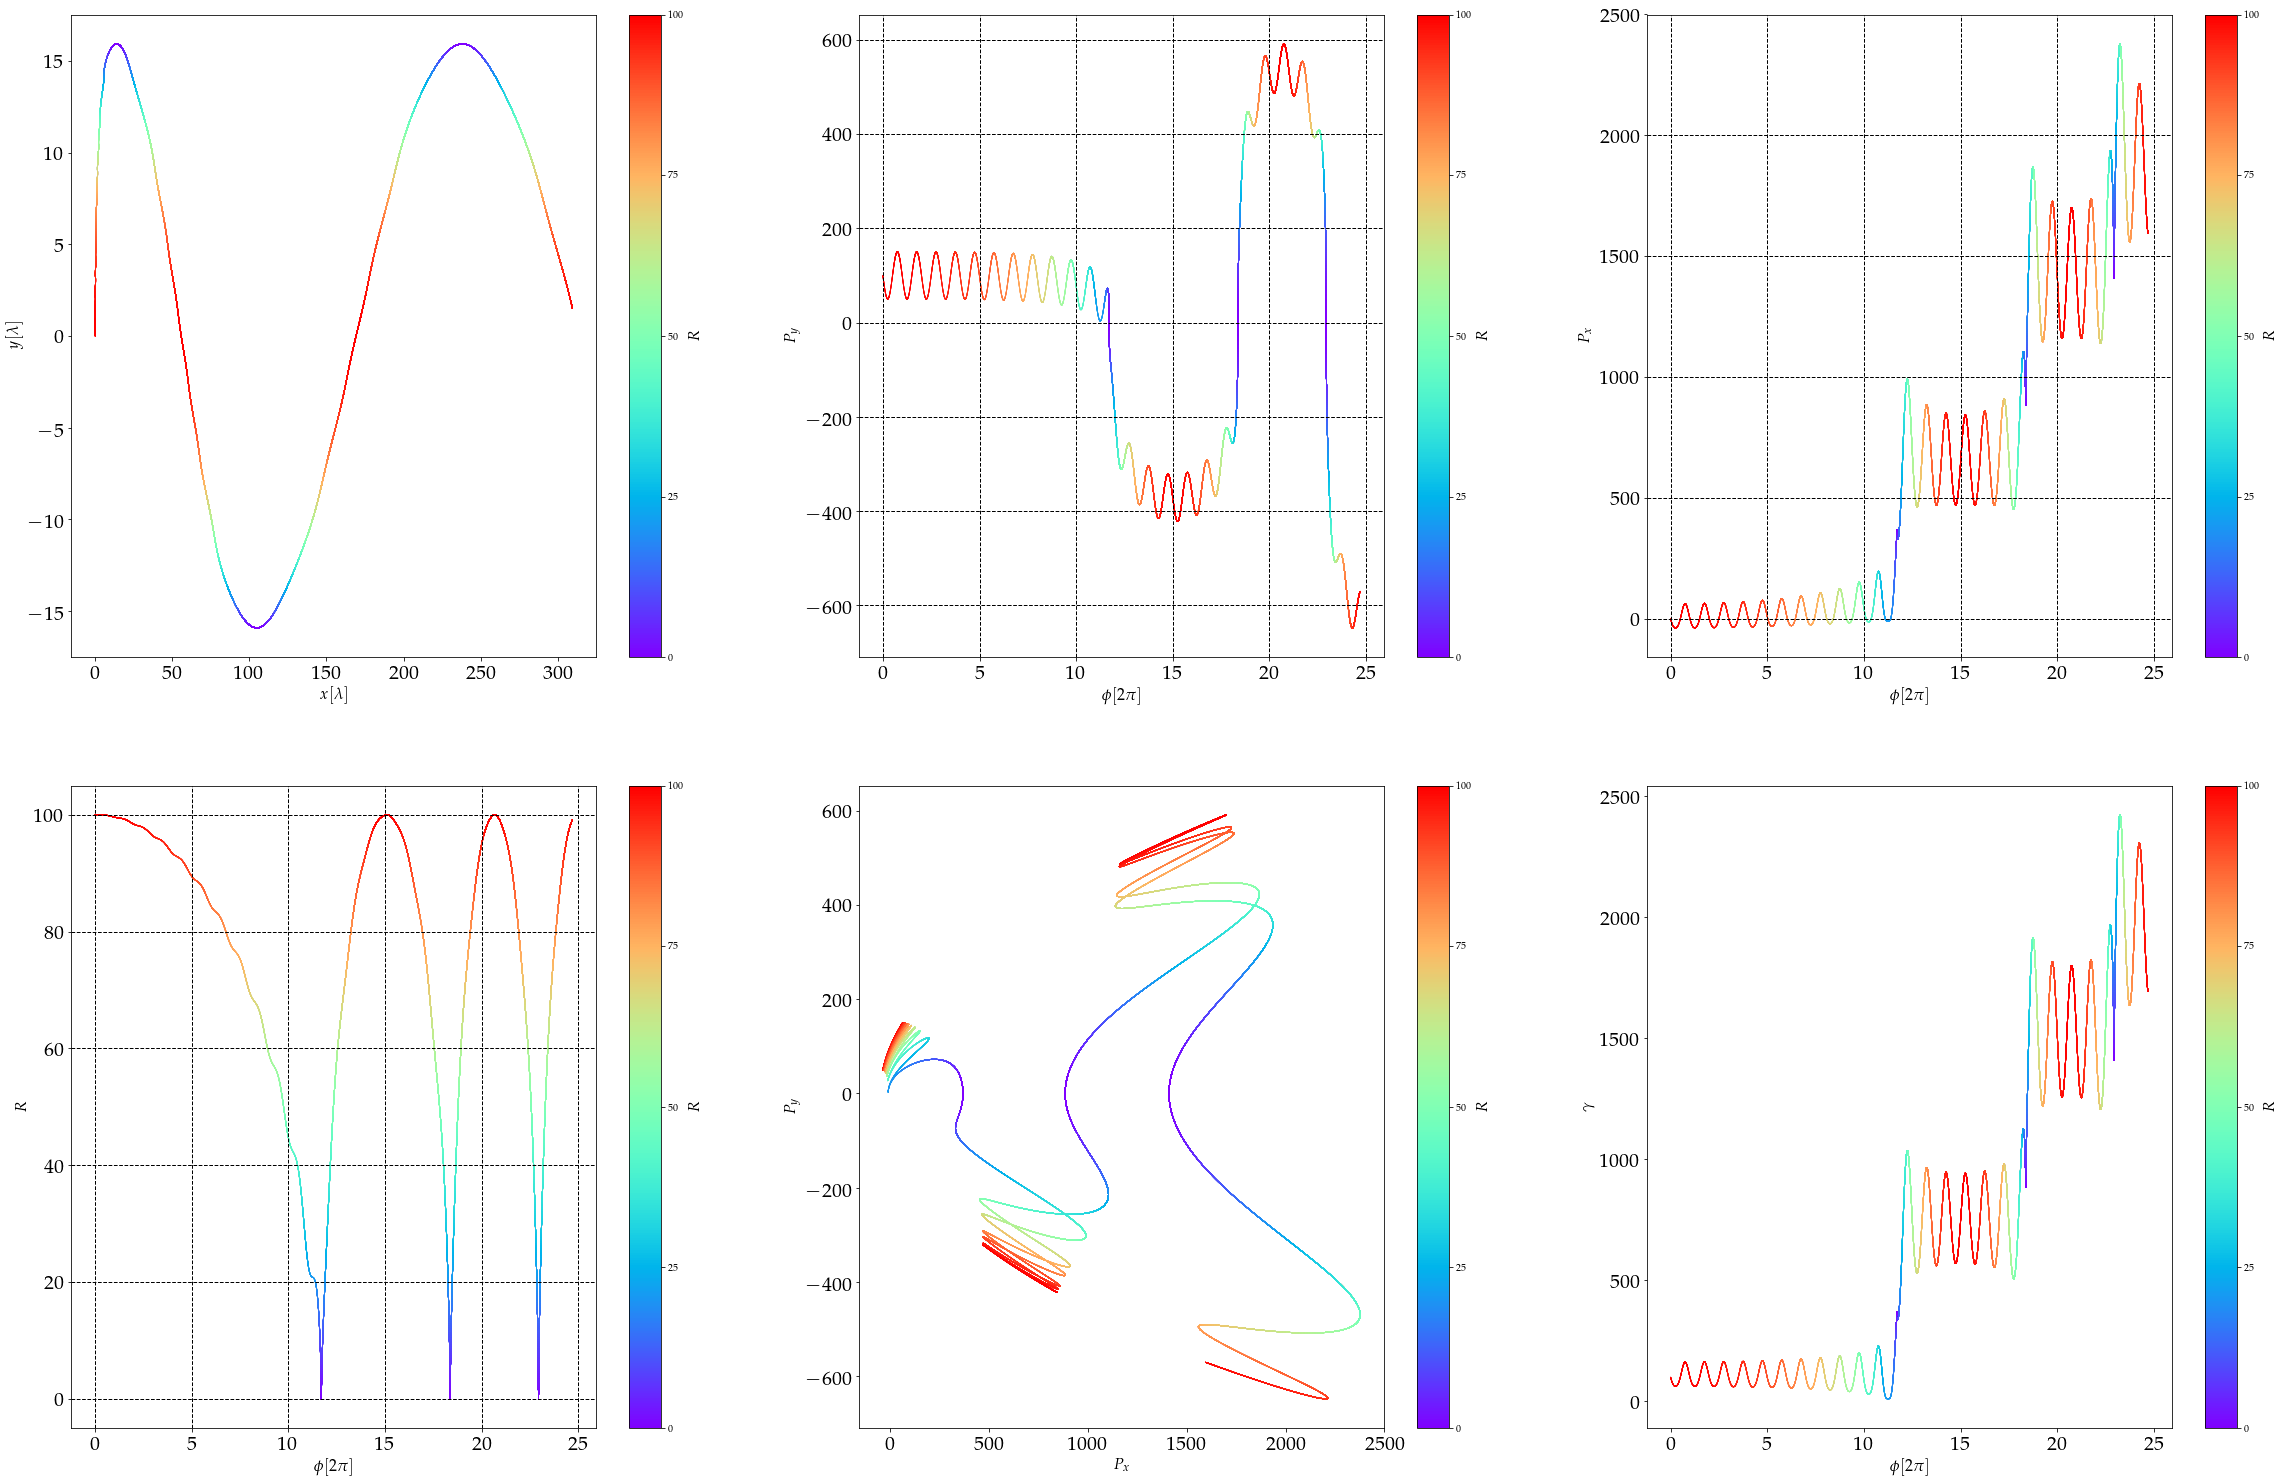

In [5]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

part_number=1
nsteps=334236

insert1='./Data/'
insert_n='_0'
t1=np.loadtxt(insert1+'t'+insert_n+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
px1=np.loadtxt(insert1+'px'+insert_n+'.txt')
py1=np.loadtxt(insert1+'py'+insert_n+'.txt')
pz1=np.loadtxt(insert1+'pz'+insert_n+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn1=np.loadtxt(insert1+'radn'+insert_n+'.txt')
radt1=np.loadtxt(insert1+'radt'+insert_n+'.txt')
opt1=np.loadtxt(insert1+'opt'+insert_n+'.txt')
eta1=np.loadtxt(insert1+'eta'+insert_n+'.txt')

t=np.reshape(t1,(part_number,nsteps))
x=np.reshape(x1,(part_number,nsteps))
y=np.reshape(y1,(part_number,nsteps))
z=np.reshape(z1,(part_number,nsteps))
px=np.reshape(px1,(part_number,nsteps))
py=np.reshape(py1,(part_number,nsteps))
pz=np.reshape(pz1,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn1,(part_number,nsteps))
radt=np.reshape(radt1,(part_number,nsteps))
opt=np.reshape(opt1,(part_number,nsteps))
eta=np.reshape(eta1,(part_number,nsteps))

gamma=np.sqrt(px**2+py**2+1)

R_dep=gamma-px

index=0
#index2=np.where(abs(y[index,:]/2/np.pi-0.0) < 1.0e-3)
plt.subplot(2,3,1)
a0=10.0
plt.scatter(x[index,:]/2/np.pi, y[index,:]/2/np.pi, c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((x[index,:])/2/np.pi,y[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$x [\lambda]$',fontdict=font)
plt.ylabel(r'$y [\lambda]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,2)
plt.scatter((t[index,:]-x[index,:])/2/np.pi,py[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,x[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
plt.grid(color='k', linestyle='--', linewidth=1)
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$P_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,3)
plt.scatter((t[index,:]-x[index,:])/2/np.pi,px[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
plt.grid(color='k', linestyle='--', linewidth=1)
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$P_x$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,4)
plt.scatter((t[index,:]-x[index,:])/2/np.pi, R_dep[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.legend(loc='upper right')
#plt.colorbar()
plt.grid(color='k', linestyle='--', linewidth=1)
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$R$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)


plt.subplot(2,3,5)
plt.scatter(px[index,:],py[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((py[index,:]),px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$P_x$',fontdict=font)
plt.ylabel('$P_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,6)
plt.scatter((t[index,:]-x[index,:])/2/np.pi,gamma[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
#print(index2)

fig = plt.gcf()
fig.set_size_inches(40, 26)
#fig.set_size_inches(5, 4.5)
#fig.savefig('./summary/a=0_b=0.01_py=100.png',format='png',dpi=1280)
#plt.close("all")